In [1]:
# Âá†‰∏™Áî®Êù•ÁªòÂà∂ÁÅ∞Â∫¶Âíå RGB ÂõæÂÉèÁöÑÂáΩÊï∞
def plot_image(image):
    # "nearest" ÂàÜËæ®Áéá‰∏çÂåπÈÖçÊó∂,Âè™ÊòæÁ§∫ÂõæÂÉèËÄå‰∏çÂ∞ùËØïÂú®ÂÉèÁ¥†‰πãÈó¥ËøõË°åÊèíÂÄº
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")


def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import os
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from functools import partial


def initialization():
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

In [3]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='../Fonts/SourceHanSerifSC-Medium.otf', size=12)

# CNNÊû∂ÊûÑ CNN Architectures

<img src="../images/other/14-6.png" width="500">

##  VGGNet

### ÂéüÁêÜ

`VGGNet`Êúâ‰∏Ä‰∏™ÈùûÂ∏∏ÁÆÄÂçïÂíåÁªèÂÖ∏ÁöÑÊû∂ÊûÑÔºåÊúâ 2 Êàñ 3 ‰∏™Âç∑ÁßØÂ±ÇÂíå‰∏Ä‰∏™Ê±†ÂåñÂ±ÇÔºåÁÑ∂ÂêéÂèàÊòØ 2 Êàñ 3 ‰∏™Âç∑ÁßØÂ±ÇÂíå‰∏Ä‰∏™Ê±†ÂåñÂ±ÇÔºå‰æùÊ≠§Á±ªÊé®ÔºàÊÄªÂÖ±Âè™Êúâ 16 Êàñ 19 ‰∏™Âç∑ÁßØÂ±ÇÔºåÂÖ∑‰ΩìÂèñÂÜ≥‰∫éVGG Âèò‰ΩìÔºâÔºåÂä†‰∏äÂÖ∑Êúâ 2 ‰∏™ÈöêËóèÂ±ÇÂíåËæìÂá∫Â±ÇÁöÑÊúÄÁªàÂØÜÈõÜÁΩëÁªú„ÄÇÂÆÉÂè™‰ΩøÁî®‰∫Ü 3 √ó 3 ‰∏™ËøáÊª§Âô®Ôºå‰ΩÜ‰ΩøÁî®‰∫ÜËÆ∏Â§öËøáÊª§Âô®„ÄÇ

ÁΩëÁªú‰∏≠ÁöÑ‰∫ÆÁÇπ: ÈÄöËøáÂ†ÜÂè†Â§ö‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏Êù•**Êõø‰ª£**Â§ßÂ∞∫Â∫¶Âç∑ÁßØÊ†∏ÔºàÂáèÂ∞ëÊâÄÈúÄÂèÇÊï∞Ôºâ‚Üí **Êã•ÊúâÁõ∏ÂêåÁöÑÊÑüÂèóÈáé**

- ËÆ∫Êñá‰∏≠ÊèêÂà∞ÔºåÂèØ‰ª•ÈÄöËøáÂ†ÜÂè†‰∏§‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏Êõø‰ª£5x5ÁöÑÂç∑ÁßØÊ†∏ÔºåÂ†ÜÂè†‰∏â‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏Êõø‰ª£7x7ÁöÑÂç∑ÁßØÊ†∏„ÄÇ

> **CNNÊÑüÂèóÈáé:**
- Âú®Âç∑ÁßØÁ•ûÁªèÁΩëÁªú‰∏≠ÔºåÂÜ≥ÂÆöÊüê‰∏ÄÂ±ÇËæìÂá∫ÁªìÊûú‰∏≠‰∏Ä‰∏™ÂÖÉÁ¥†ÊâÄÂØπÂ∫îÁöÑËæìÂÖ•Â±ÇÁöÑÂå∫ÂüüÂ§ßÂ∞èÔºåË¢´Áß∞‰ΩúÊÑüÂèóÈáé„ÄÇÈÄö‰øóÁöÑËß£ÈáäÊòØÔºåËæìÂá∫ÁâπÂæÅÂõæ‰∏äÁöÑ‰∏Ä‰∏™ÂçïÂÖÉÂØπÂ∫îËæìÂÖ•Â±Ç‰∏äÁöÑÂå∫ÂüüÂ§ßÂ∞è„ÄÇ
<img src="../images/other/14-24.png" width="600">
- ÊÑüÂèóÈáéËÆ°ÁÆóÂÖ¨ÂºèÔºö$F (i) = [ F (i + 1) - 1] √ó Stride + Ksize$
- ‰æã:Â†ÜÂè†‰∏â‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏Êõø‰ª£7x7ÁöÑÂç∑ÁßØÊ†∏
    - ÁâπÂæÅÂõæ: $F(4) = 1$
    - $Conv3√ó3(3): F(3) = (1-1) √ó 1 + 3 = 3$
    - $Conv3√ó3(2): F(2) = (3-1) √ó 1 + 3 = 5$
    - $Conv3√ó3(1): F(1) = (5-1) √ó 1 + 3 = 7$

‰ΩøÁî®7x7Âç∑ÁßØÊ†∏ÊâÄÈúÄÂèÇÊï∞Ôºå‰∏éÂ†ÜÂè†‰∏â‰∏™3x3Âç∑ÁßØÊ†∏ÊâÄÈúÄÂèÇÊï∞(ÂÅáËÆæËæìÂÖ•ËæìÂá∫channel‰∏∫$C$):
> - Âç∑ÁßØÂ±ÇÁöÑÊùÉÈáçÂèØ‰ª•Ë°®Á§∫‰∏∫$[f_h,f_w,f_{n^{'}},f_n]$ÁöÑ4DÂº†Èáè
    - $f_h,f_w$Ë°®Á§∫Êé•ÂèóÈáéÁöÑÈ´òÂ∫¶ÂíåÂÆΩÂ∫¶
    - $f_{n^{'}},f_n$Ë°®Á§∫‰∏ä‰∏ÄÂ±Ç‰∏≠ÁâπÂæÅÂõæ‰∏™Êï∞ÂíåËøô‰∏ÄÂ±Ç‰∏≠ÁâπÂæÅÂõæ‰∏™Êï∞

- $7 √ó 7 √ó C √ó C = 49C^2 $
- $3 √ó 3 √ó C √ó C + 3 √ó 3 √ó C √ó C + 3 √ó 3 √ó C √ó C = 27C^2 $

ÁΩëÁªú‰∏≠ÊâÄÈúÄÂèÇÊï∞Â§ß‰∏∫ÂáèÂ∞ë.

- `VGG16`ÁöÑÁΩëÁªúÁªìÊûÑ

    ÂéüËÆ∫Êñá‰∏≠ÂàÜÂà´‰ΩøÁî®‰∫ÜA„ÄÅA-LRN„ÄÅB„ÄÅC„ÄÅD„ÄÅEËøô6ÁßçÁΩëÁªúÁªìÊûÑËøõË°åÊµãËØïÔºåËøô6ÁßçÁΩëÁªúÁªìÊûÑÁõ∏‰ººÔºåÈÉΩÊòØÁî±5Â±ÇÂç∑ÁßØÂ±Ç„ÄÅ3Â±ÇÂÖ®ËøûÊé•Â±ÇÁªÑÊàêÔºåÂÖ∂‰∏≠Âå∫Âà´Âú®‰∫éÊØè‰∏™Âç∑ÁßØÂ±ÇÁöÑÂ≠êÂ±ÇÊï∞Èáè‰∏çÂêåÔºå‰ªéAËá≥E‰æùÊ¨°Â¢ûÂä†ÔºàÂ≠êÂ±ÇÊï∞Èáè‰ªé1Âà∞4ÔºâÔºåÊÄªÁöÑÁΩëÁªúÊ∑±Â∫¶‰ªé11Â±ÇÂà∞19Â±ÇÔºàÊ∑ªÂä†ÁöÑÂ±Ç‰ª•Á≤ó‰ΩìÊòæÁ§∫ÔºâÔºåË°®Ê†º‰∏≠ÁöÑÂç∑ÁßØÂ±ÇÂèÇÊï∞Ë°®Á§∫‰∏∫`conv(ÊÑüÂèóÈáéÂ§ßÂ∞è)-ÈÄöÈÅìÊï∞`Ôºå‰æãÂ¶Ç`conv3-128`ÔºåË°®Á§∫‰ΩøÁî®3x3ÁöÑÂç∑ÁßØÊ†∏ÔºåÈÄöÈÅìÊï∞‰∏∫128„ÄÇÂÖ∂‰∏≠ÔºåÁΩëÁªúÁªìÊûÑDÂ∞±ÊòØËëóÂêçÁöÑ`VGG16`ÔºåÁΩëÁªúÁªìÊûÑEÂ∞±ÊòØËëóÂêçÁöÑ`VGG19`„ÄÇ

<img src="../images/other/14-27.png">

1. ËæìÂÖ•ÂÉèÁ¥†‰∏∫224√ó224√ó3ÁöÑÂõæÁâáÔºåÁªè64‰∏™3√ó3ÁöÑÂç∑ÁßØÊ†∏‰Ωú‰∏§Ê¨°Âç∑ÁßØ+ReLUÔºåÂç∑ÁßØÂêéÁöÑÂ∞∫ÂØ∏Âèò‰∏∫224√ó224√ó64
   - $\frac{224-3+2√ó1}{1}+1=224$
2. ‰Ωúmax poolingÔºàÊúÄÂ§ßÂåñÊ±†ÂåñÔºâÔºåÊ±†ÂåñÂçïÂÖÉÂ∞∫ÂØ∏‰∏∫2x2ÔºàÊïàÊûú‰∏∫ÂõæÂÉèÂ∞∫ÂØ∏ÂáèÂçäÔºâÔºåÊ±†ÂåñÂêéÁöÑÂ∞∫ÂØ∏Âèò‰∏∫112x112x64
    - $\frac{224-2}{2}+1=112$
3. Áªè128‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏‰Ωú‰∏§Ê¨°Âç∑ÁßØ+ReLUÔºåÂ∞∫ÂØ∏Âèò‰∏∫112x112x128
4. ‰Ωú2x2ÁöÑmax poolingÊ±†ÂåñÔºåÂ∞∫ÂØ∏Âèò‰∏∫56x56x128
5. Áªè256‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏‰Ωú‰∏âÊ¨°Âç∑ÁßØ+ReLUÔºåÂ∞∫ÂØ∏Âèò‰∏∫56x56x256
6. ‰Ωú2x2ÁöÑmax poolingÊ±†ÂåñÔºåÂ∞∫ÂØ∏Âèò‰∏∫28x28x256
7. Áªè512‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏‰Ωú‰∏âÊ¨°Âç∑ÁßØ+ReLUÔºåÂ∞∫ÂØ∏Âèò‰∏∫28x28x512
8. ‰Ωú2x2ÁöÑmax poolingÊ±†ÂåñÔºåÂ∞∫ÂØ∏Âèò‰∏∫14x14x512
9. Áªè512‰∏™3x3ÁöÑÂç∑ÁßØÊ†∏‰Ωú‰∏âÊ¨°Âç∑ÁßØ+ReLUÔºåÂ∞∫ÂØ∏Âèò‰∏∫14x14x512
10. ‰Ωú2x2ÁöÑmax poolingÊ±†ÂåñÔºåÂ∞∫ÂØ∏Âèò‰∏∫7x7x512
11. ‰∏é‰∏§Â±Ç1x1x4096Ôºå‰∏ÄÂ±Ç1x1x1000ËøõË°åÂÖ®ËøûÊé•+ReLUÔºàÂÖ±‰∏âÂ±ÇÔºâ
    - Âç∑ÁßØÂ±ÇÂíåÂÖ®ËøûÊé•Â±ÇÁöÑÂîØ‰∏ÄÂå∫Âà´Â∞±ÊòØÂç∑ÁßØÂ±ÇÁöÑÁ•ûÁªèÂÖÉÂíåËæìÂÖ•ÊòØÂ±ÄÈÉ®ËÅîÁ≥ªÁöÑÔºåÂπ∂‰∏îÂêå‰∏Ä‰∏™ÈÄöÈÅìÔºàchannelÔºâÂÜÖÁöÑ‰∏çÂêåÁ•ûÁªèÂÖÉÂÖ±‰∫´ÊùÉÂÄºÔºàweightÔºâ„ÄÇÂç∑ÁßØÂ±ÇÂíåÂÖ®ËøûÊé•Â±ÇÁöÑËÆ°ÁÆóÂÆûÈôÖ‰∏äÁõ∏ÂêåÔºåÂõ†Ê≠§ÂèØ‰ª•Â∞ÜÂÖ®ËøûÊé•Â±ÇËΩ¨Êç¢‰∏∫Âç∑ÁßØÂ±ÇÔºåÂè™Ë¶ÅÂ∞ÜÂç∑ÁßØÊ†∏Â§ßÂ∞èËÆæÁΩÆ‰∏∫ËæìÂÖ•Á©∫Èó¥Â§ßÂ∞èÂç≥ÂèØÔºö‰æãÂ¶ÇËæìÂÖ•‰∏∫7x7x512ÔºåÁ¨¨‰∏ÄÂ±ÇÂÖ®ËøûÊé•Â±ÇËæìÂá∫4096ÔºõÊàë‰ª¨ÂèØ‰ª•Â∞ÜÂÖ∂Áúã‰ΩúÂç∑ÁßØÊ†∏Â§ßÂ∞è‰∏∫7x7ÔºåÊ≠•Èïø‰∏∫1ÔºåÊ≤°ÊúâÂ°´ÂÖÖÔºåËæìÂá∫‰∏∫1x1x4096ÁöÑÂç∑ÁßØÂ±Ç„ÄÇËøôÊ†∑ÁöÑÂ•ΩÂ§ÑÂú®‰∫éËæìÂÖ•ÂõæÂÉèÁöÑÂ§ßÂ∞è‰∏çÂÜçÂèóÈôêÂà∂ÔºåÂõ†Ê≠§ÂèØ‰ª•È´òÊïàÂú∞ÂØπÂõæÂÉè‰ΩúÊªëÂä®Á™óÂºèÈ¢ÑÊµãÔºõËÄå‰∏îÂÖ®ËøûÊé•Â±ÇÁöÑËÆ°ÁÆóÈáèÊØîËæÉÂ§ßÔºåÁ≠âÊïàÂç∑ÁßØÂ±ÇÁöÑËÆ°ÁÆóÈáèÂáèÂ∞è‰∫ÜÔºåËøôÊ†∑Êó¢ËææÂà∞‰∫ÜÁõÆÁöÑÂèàÂçÅÂàÜÈ´òÊïà„ÄÇ
    - ËôΩÁÑ∂ `VGGNet` ÂáèÂ∞ë‰∫ÜÂç∑ÁßØÂ±ÇÂèÇÊï∞Ôºå‰ΩÜÂÆûÈôÖ‰∏äÂÖ∂ÂèÇÊï∞Á©∫Èó¥ÊØî `AlexNet` Â§ßÔºåÂÖ∂‰∏≠**ÁªùÂ§ßÂ§öÊï∞ÁöÑÂèÇÊï∞ÈÉΩÊòØÊù•Ëá™‰∫éÁ¨¨‰∏Ä‰∏™ÂÖ®ËøûÊé•Â±Ç**ÔºåËÄóË¥πÊõ¥Â§öËÆ°ÁÆóËµÑÊ∫ê„ÄÇÂú®ÈöèÂêéÁöÑ NIN ‰∏≠ÂèëÁé∞Â∞ÜËøô‰∫õÂÖ®ËøûÊé•Â±ÇÊõøÊç¢‰∏∫ÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÔºåÂØπ‰∫éÊÄßËÉΩÂΩ±Âìç‰∏çÂ§ßÔºåÂêåÊó∂ÊòæËëóÈôç‰Ωé‰∫ÜÂèÇÊï∞Êï∞Èáè„ÄÇ
12. Âú®FCÂ±Ç‰∏≠Èó¥ÈááÁî®dropoutÂ±ÇÔºåÈò≤Ê≠¢ËøáÊãüÂêà
<img src="../images/other/14-28.png" width="400">
12. ÈÄöËøásoftmaxËæìÂá∫1000‰∏™È¢ÑÊµãÁªìÊûú

### `VGG16`ÊºîÁ§∫

In [2]:
initialization()

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Softmax
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras.layers.merge import concatenate

In [4]:
# Ê†πÊçÆËÆ∫ÊñáÊâÄÁªô‰ø°ÊÅØ,ÂÆö‰πâÂèÇÊï∞ÈÖçÁΩÆÂ≠óÂÖ∏
cfgs = {
    'vgg11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'vgg16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'vgg19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

In [5]:
# ÊèêÂèñÁâπÂæÅ‰ø°ÊÅØ
def make_feature(cfg):
    feature_layers = []
    for i in cfg:
        if i == "M":
            MaxPooling_layer = MaxPooling2D(pool_size=2, strides=2)
            feature_layers.append(MaxPooling_layer)
        else:
            Conv2D_layer = Conv2D(filters=i, kernel_size=3, padding="SAME",
                                  activation=keras.activations.relu,
                                  kernel_regularizer=l2(0.01))
            feature_layers.append(Conv2D_layer)
    return keras.models.Sequential(feature_layers, name='feature')

- ÂàÜÁ±ªÁΩëÁªúÁªìÊûÑ

In [6]:
def VGG_model(feature, height=224, width=224, num_classes=1000):
    # num_classes Ê†áÁ≠æÁöÑÁ±ªÂà´Êï∞Èáè
    input = Input(shape=(height, width, 3))
    x = feature(input)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(2048, activation=keras.activations.relu)(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(2048, activation=keras.activations.relu)(x)

    x = Dense(num_classes)(x)
    output = Softmax()(x)
    model = Model(inputs=input, outputs=output)
    return model

In [7]:
def VGG(model_name="vgg16", height=224, width=224, num_classes=1000):
    assert model_name in cfgs.keys(), "not support model {}".format(model_name)
    cfg = cfgs[model_name]
    model = VGG_model(make_feature(cfg), height, width, num_classes)
    return model

2. Êü•Áúã`VGG16`Ê®°ÂûãÁªìÊûÑ

In [8]:
model = VGG('vgg16', 224, 224, 10)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
feature (Sequential)         (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              51382272  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              419635

2022-01-07 01:52:32.269713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 01:52:32.362117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 01:52:32.362813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 01:52:32.363920: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

3. Âä†ËΩΩ,È¢ÑÂ§ÑÁêÜÊï∞ÊçÆÈõÜ

Â¶ÇÊûú‰ΩøÁî®`ËøÅÁßªÂ≠¶‰π†`,ÈúÄË¶ÅÂú®ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÈÉ®ÂàÜÂáèÂéª`ImageNet`ÊâÄÊúâÂõæÂÉèÁöÑÂùáÂÄº,Âç≥**\[123.68, 116.78, 103.94\]**

In [9]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("Cifar10", as_supervised=True, with_info=True)

class_names = info.features["label"].names
train_size = info.splits["train"].num_examples
test_size = info.splits["test"].num_examples

2022-01-07 01:52:36.513282: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling cifar10-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar10-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [10]:
train_set_raw = tfds.load("Cifar10", as_supervised=True)['train']
test_set_raw, valid_set_raw = tfds.load("Cifar10",
                                        split=["test[:60%]", "test[60%:]"],
                                        as_supervised=True)

In [11]:
from keras.utils import np_utils


# È¢ÑÂ§ÑÁêÜ
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    label = tf.cast(label, dtype=tf.int32)
    label = tf.squeeze(label)  # tf.squeeze():Áî®‰∫é‰ªéÂº†ÈáèÂΩ¢Áä∂‰∏≠ÁßªÈô§Â§ßÂ∞è‰∏∫1ÁöÑÁª¥Â∫¶
    label = tf.one_hot(label, depth=10)
    return resized_image, label


batch_size = 64
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [12]:
root_logdir = os.path.join(os.curdir, "../Logs/my_VGG16_logs")
root_logdir


def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_dir = get_run_logdir()
run_dir

tensorboard_cb = keras.callbacks.TensorBoard(run_dir)

2022-01-07 01:53:50.560270: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-07 01:53:50.560316: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-07 01:53:50.562249: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-01-07 01:53:50.724974: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-07 01:53:50.725183: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


4. ËÆ≠ÁªÉ,ËØÑ‰º∞Ê®°Âûã

In [13]:
# ÁºñËØëÊ®°Âûã
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
# optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
#                                  nesterov=True, decay=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
# ËÆ≠ÁªÉÊ®°Âûã
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='../my_VGG16.h5',
                                       save_best_only=True,
                                       ave_weights_only=True,
                                       monitor='val_loss'), tensorboard_cb
]

history = model.fit(train_set,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.4 * test_size / batch_size),
                    epochs=100,
                    callbacks=callbacks)

2022-01-07 01:53:51.002454: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-01-07 01:53:53.226285: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/781 [..............................] - ETA: 3:10:07 - loss: 41.1680 - accuracy: 0.0312

2022-01-07 01:54:05.687535: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-07 01:54:05.687581: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/781 [..............................] - ETA: 8:57 - loss: 41.0604 - accuracy: 0.0625   

2022-01-07 01:54:06.348091: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-07 01:54:06.348930: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-01-07 01:54:06.486377: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 465 callback api events and 462 activity events. 
2022-01-07 01:54:06.499134: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-07 01:54:06.529352: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ././Logs/my_VGG16_logs/run_2022_01_07-01_53_50/train/plugins/profile/2022_01_07_01_54_06

2022-01-07 01:54:06.542802: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ././Logs/my_VGG16_logs/run_2022_01_07-01_53_50/train/plugins/profile/2022_01_07_01_54_06/401e1ed6a6d0.trace.json.gz
2022-01-07 01:54:06.576298: I tensorfl

781/781 [==============================] - 323s 395ms/step - loss: 9.1317 - accuracy: 0.3216 - val_loss: 2.8247 - val_accuracy: 0.4370
Epoch 2/100
781/781 [==============================] - 312s 399ms/step - loss: 2.4039 - accuracy: 0.4757 - val_loss: 2.1120 - val_accuracy: 0.5171
Epoch 3/100
781/781 [==============================] - 308s 395ms/step - loss: 1.9207 - accuracy: 0.5545 - val_loss: 1.8013 - val_accuracy: 0.5776
Epoch 4/100
781/781 [==============================] - 312s 399ms/step - loss: 1.6505 - accuracy: 0.6099 - val_loss: 1.5500 - val_accuracy: 0.6343
Epoch 5/100
781/781 [==============================] - 312s 399ms/step - loss: 1.4521 - accuracy: 0.6582 - val_loss: 1.4200 - val_accuracy: 0.6595
Epoch 6/100
781/781 [==============================] - 309s 395ms/step - loss: 1.2970 - accuracy: 0.6944 - val_loss: 1.3291 - val_accuracy: 0.6746
Epoch 7/100
781/781 [==============================] - 312s 400ms/step - loss: 1.1756 - accuracy: 0.7261 - val_loss: 1.2307 - val_

In [14]:
model = keras.models.load_model("../my_VGG16.h5")
model.evaluate(test_set)

94/94 [==============================] - 15s 151ms/step - loss: 1.0689 - accuracy: 0.7522


[1.068851351737976, 0.7521666884422302]

In [15]:
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["accuracy"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_accuracy"]

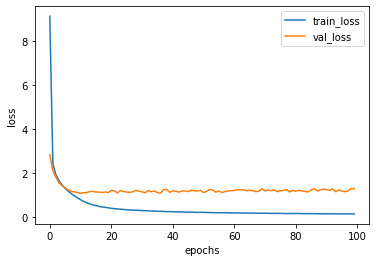

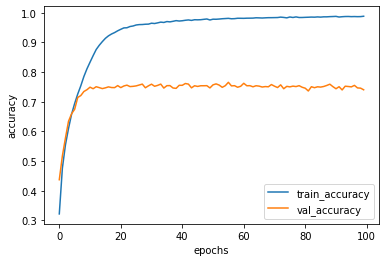

In [16]:
epochs = 100
# figure 1
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# figure 2
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [4]:
%load_ext tensorboard
%tensorboard --logdir=../Logs/my_VGG16_logs --port=6061

## ResNet

### ÂéüÁêÜ

- `ÊÆãÂ∑ÆÁΩëÁªú residual Network`ÊâÄË¶ÅËß£ÂÜ≥ÁöÑÈóÆÈ¢ò
    1. `Ê¢ØÂ∫¶Ê∂àÂ§±ÈóÆÈ¢ò`:ÂèçÂêë‰º†Êí≠ÁÆóÊ≥ï‰∏≠ÔºåÈöèÁùÄÁÆóÊ≥ïÂêë‰∏ã‰º†Êí≠Âà∞ËæÉ‰ΩéÂ±ÇÔºåÊ¢ØÂ∫¶ÈÄöÂ∏∏‰∏∫Ë∂äÊù•Ë∂äÂ∞è„ÄÇÁªìÊûúÊ¢ØÂ∫¶‰∏ãÈôçÊõ¥Êñ∞‰ΩøËæÉ‰ΩéÂ±ÇÁöÑËøûÊé•ÊùÉÈáç‰øùÊåÅ‰∏çÂèòÔºåËÆ≠ÁªÉ‰∏çËÉΩÊî∂ÊïõÂà∞‰∏Ä‰∏™ËâØÂ•ΩÁöÑËß£„ÄÇ
    2. `ÈÄÄÂåñÈóÆÈ¢ò`:Âú®Ê®°ÂûãÁöÑÊØèÂ±Ç‰∏≠Âè™ÊúâÂ∞ëÈáèÈöêËóèÂçïÂÖÉÂØπ‰∏çÂêåÁöÑËæìÂÖ•ÊîπÂèòÂÆÉ‰ª¨ÁöÑÊøÄÊ¥ªÂÄºÔºåËÄåÂ§ßÈÉ®ÂàÜÈöêËóèÂçïÂÖÉÂØπ‰∏çÂêåËæìÂÖ•ÈÉΩÊòØÁõ∏ÂêåÂèçÂ∫î.‰ΩøÂæóËÆ≠ÁªÉËØØÂ∑ÆÂíåÊµãËØïËØØÂ∑ÆÈÉΩÂæàÈ´ò.

    `ÊÆãÂ∑ÆÁΩëÁªú`ÈÄöËøáÁªôÈùûÁ∫øÊÄßÁöÑÂç∑ÁßØÂ±Ç**Â¢ûÂä†Áõ¥ËøûËæπ**ÁöÑÊñπÂºèÊù•ÊèêÈ´ò‰ø°ÊÅØÁöÑ‰º†Êí≠ÊïàÁéá.

- Ê®°ÂûãÂéüÁêÜ:

    - ÂÅáËÆæÂú®‰∏Ä‰∏™Ê∑±Â∫¶ÁΩëÁªú‰∏≠, Êàë‰ª¨ÊúüÊúõ‰∏Ä‰∏™ÈùûÁ∫øÊÄßÂçïÂÖÉ$f(\boldsymbol{x} ; \boldsymbol{\theta})$ ÂéªÈÄºËøë‰∏Ä‰∏™ÁõÆÊ†áÂáΩÊï∞‰∏∫ $h(\boldsymbol{x})$. Â¶ÇÊûúÂ∞ÜÁõÆÊ†áÂáΩÊï∞ÊãÜÂàÜÊàê‰∏§ÈÉ®ÂàÜ: ÊÅíÁ≠âÂáΩÊï∞$\boldsymbol{x}$ ÂíåÊÆãÂ∑ÆÂáΩÊï∞$h(\boldsymbol{x})-\boldsymbol{x}$.
$$
h(\boldsymbol{x})=\underbrace{\boldsymbol{x}}_{\text {ÊÅíÁ≠âÂáΩÊï∞ }}+\underbrace{(h(\boldsymbol{x})-\boldsymbol{x})}_{\text {ÊÆãÂ∑ÆÂáΩÊï∞ }} .
$$
    - Ê†πÊçÆÈÄöÁî®Ëøë‰ººÂÆöÁêÜ, ‰∏Ä‰∏™Áî±Á•ûÁªèÁΩëÁªúÊûÑÊàêÁöÑÈùûÁ∫øÊÄßÂçïÂÖÉÊúâË∂≥Â§üÁöÑËÉΩÂäõÊù•Ëøë‰ººÈÄºËøëÂéüÂßãÁõÆÊ†áÂáΩÊï∞ÊàñÊÆãÂ∑ÆÂáΩÊï∞, ‰ΩÜÂÆûÈôÖ‰∏≠ÂêéËÄÖÊõ¥ÂÆπÊòìÂ≠¶‰π†.

    Âõ†Ê≠§, ÂéüÊù•ÁöÑ‰ºòÂåñÈóÆÈ¢òÂèØ‰ª•ËΩ¨Êç¢‰∏∫: **ËÆ©ÈùûÁ∫øÊÄßÂçïÂÖÉ $f(\boldsymbol{x} ; \theta)$ ÂéªËøë‰ººÊÆãÂ∑ÆÂáΩÊï∞ $h(\boldsymbol{x})-\boldsymbol{x}$, Âπ∂Áî® $f(\boldsymbol{x} ; \theta)+\boldsymbol{x}$ ÂéªÈÄºËøë $h(\boldsymbol{x})$.**
    <img src="../images/other/14-30.png" width="400">

- ÁΩëÁªú‰∏≠ÁöÑ‰∫ÆÁÇπ:
    1. Ë∂ÖÊ∑±ÁöÑÁΩëÁªúÁªìÊûÑ(Á™ÅÁ†¥1000Â±Ç) 
    2. ÊèêÂá∫ `residualÊ®°Âùó`
    3. ‰ΩøÁî® `Batch Normalization`Âä†ÈÄüËÆ≠ÁªÉ(‰∏¢ÂºÉ `dropout`)

- ResNetÊû∂ÊûÑ:
    <img src="../images/other/14-32.png" width="500">
    <img src="../images/other/14-35.png" width="700">

- `residual`Ê®°Âùó
    - ‰∏ªÂàÜÊîØ‰∏éÊç∑ÂæÑÂàÜÊîØÁöÑËæìÂá∫ÁâπÂæÅÁü©ÈòµshapeÂøÖÈ°ªÁõ∏Âêå
        - `34-layer`: `conv3_x`
            <img src="../images/other/14-37.png">
        - `50-layer`: `conv3_x`
            <img src="../images/other/14-38.png">
            ‰∏§‰∏™1X1Âç∑ÁßØÂ±ÇÂàÜÂà´Áî®‰∫éÈôç‰ΩéÂíåÂçáÈ´òÁâπÂæÅÁª¥Â∫¶Ôºå‰∏ªË¶ÅÁõÆÁöÑÊòØ‰∏∫‰∫ÜÂáèÂ∞ëÂèÇÊï∞ÁöÑÊï∞ÈáèÔºå‰ªéËÄåÂáèÂ∞ëËÆ°ÁÆóÈáèÔºå‰∏îÂú®ÈôçÁª¥‰πãÂêéÂèØ‰ª•Êõ¥Âä†ÊúâÊïà„ÄÅÁõ¥ËßÇÂú∞ËøõË°åÊï∞ÊçÆÁöÑËÆ≠ÁªÉÂíåÁâπÂæÅÊèêÂèñ,Âç≥‰ΩøÂÆÉ‰ª¨‰∏≠Èó¥ÁöÑ3√ó3Âç∑ÁßØÂ±ÇÁöÑËæìÂÖ•ÂíåËæìÂá∫ÁöÑÈÄöÈÅìÊï∞ÈÉΩËæÉÂ∞èÔºåÂõ†Ê≠§ÊïàÁéáÊõ¥È´ò„ÄÇ
    - ‰∏äÂõæ‰∏≠`conv3_x`,`conv4_x`Âíå`conv5_x`ÊåáÁöÑÊòØÂêÑÊÆãÂ∑ÆÁªìÊûÑÁöÑÁ¨¨‰∏ÄÂ±ÇÊÆãÂ∑ÆÊ®°Âùó 
        - ÂØπ‰∫é`18-layer`Âíå`34-layer`: ÊúÄÂ§ßÊ±†Âåñ‰∏ãÈááÊ†∑ÂêéÂæóÂà∞ÁöÑËæìÂá∫‰∏∫[56,56,64],Ê≠£Â•ΩÊòØÂÆûÁ∫øÊÆãÂ∑ÆÁªìÊûÑÊâÄÈúÄË¶ÅÁöÑËæìÂÖ•shape,Âõ†Ê≠§Á¨¨‰∏ÄÂ±Ç‰∏çÈúÄË¶ÅËôöÁ∫øÁªìÊûÑ
        - ÂØπ‰∫é`50-layer`,`101-layer`Âíå`152-layer`:ÊúÄÂ§ßÊ±†Âåñ‰∏ãÈááÊ†∑ÂêéÂæóÂà∞ÁöÑËæìÂá∫‰∏∫[56,56,64],ËÄåÂÆûÁ∫øÊÆãÂ∑ÆÁªìÊûÑÊâÄÈúÄË¶ÅÁöÑËæìÂÖ•‰∏∫[56,56,256],Âõ†Ê≠§Á¨¨‰∏ÄÂ±ÇÈúÄË¶ÅËôöÁ∫øÁªìÊûÑ,‰ªÖÁî®Êù•Ë∞ÉÊï¥ÁâπÂæÅÁü©ÈòµÁöÑÊ∑±Â∫¶.

- ResNet-50Êû∂ÊûÑ:
 <img src="../images/other/14-40.png">

### ÊâπÈáèÂΩí‰∏ÄÂåñ Batch Normalization

`ÊâπÈáèÂΩí‰∏ÄÂåñ(Batch Normalization,BN)`ÊñπÊ≥ïÊòØ‰∏ÄÁßçÊúâÊïàÁöÑÈÄêÂ±ÇÂΩí‰∏ÄÂåñÊñπÊ≥ï,ÂèØ‰ª•ÂØπÁ•ûÁªèÁΩëÁªú‰∏≠‰ªªÊÑèÁöÑ‰∏≠Èó¥Â±ÇËøõË°åÂΩí‰∏ÄÂåñÊìç‰Ωú. 
1. ËØ•Êìç‰ΩúÊòØÂØπÊØè‰∏™ËæìÂÖ•**Èõ∂‰∏≠ÂøÉÂåñÂπ∂ÂΩí‰∏ÄÂåñ**;‰∏∫‰∫Ü‰ΩøÂæóÂΩí‰∏ÄÂåñ‰∏çÂØπÁΩëÁªúÁöÑË°®Á§∫ËÉΩÂäõÈÄ†ÊàêË¥üÈù¢ÂΩ±Âìç,ÂèØ‰ª•ÈÄöËøá‰∏Ä‰∏™ÈôÑÂä†ÁöÑ**Áº©ÊîæÂíåÂπ≥ÁßªÂèòÊç¢**ÊîπÂèòÂèñÂÄºÂå∫Èó¥.
2. ÊâπÈáèÂΩí‰∏ÄÂåñÊìç‰ΩúÂèØ‰ª•Áúã‰Ωú‰∏Ä‰∏™ÁâπÊÆäÁöÑÁ•ûÁªèÂ±Ç,Âä†Âú®ÊØè‰∏ÄÂ±ÇÈùûÁ∫øÊÄßÊøÄÊ¥ªÂáΩÊï∞Ââç
3. `BNÂ±Ç`Ê∑ªÂä†‰∏∫Á¨¨‰∏ÄÂ±ÇÁöÑËØùÔºåÈÄöÂ∏∏Êó†ÈúÄËøõË°åÂΩí‰∏ÄÂåñËÆ≠ÁªÉÈõÜ

> **ÊâπÈáèÂΩí‰∏ÄÂåñÁÆóÊ≥ï**:
ÁªôÂÆö‰∏Ä‰∏™ÂåÖÂê´ $K$ ‰∏™Ê†∑Êú¨ÁöÑÂ∞èÊâπÈáèÊ†∑Êú¨ÈõÜÂêà, Á¨¨ $l$ Â±ÇÁ•ûÁªèÂÖÉÁöÑÂáÄËæìÂÖ• $\boldsymbol{z}^{(1, l)}$, $\cdots, \boldsymbol{z}^{(K, l)}$ ÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ‰∏∫
$$
\begin{aligned}
&\mu_{\mathcal{B}}=\frac{1}{K} \sum_{k=1}^{K} z^{(k, l)} \\
&\sigma_{\mathcal{B}}^{2}=\frac{1}{K} \sum_{k=1}^{K}\left(\boldsymbol{z}^{(k, l)}-\boldsymbol{\mu}_{\mathcal{B}}\right) \odot\left(\boldsymbol{z}^{(k, l)}-\mu_{\mathcal{B}}\right)
\end{aligned}
$$
ÂØπÂáÄËæìÂÖ• $\boldsymbol{z}^{(l)}$ ÁöÑÊ†áÂáÜÂΩí‰∏ÄÂåñ‰ºö‰ΩøÂæóÂÖ∂ÂèñÂÄºÈõÜ‰∏≠Âà∞ 0 ÈôÑËøë, Â¶ÇÊûú‰ΩøÁî® Sigmoid ÂûãÊøÄÊ¥ªÂáΩÊï∞Êó∂, Ëøô‰∏™ÂèñÂÄºÂå∫Èó¥ÂàöÂ•ΩÊòØÊé•ËøëÁ∫øÊÄßÂèòÊç¢ÁöÑÂå∫Èó¥, ÂáèÂº±‰∫ÜÁ•ûÁªèÁΩëÁªúÁöÑÈùûÁ∫øÊÄßÊÄßË¥®. Âõ†Ê≠§, ‰∏∫‰∫Ü‰ΩøÂæóÂΩí‰∏ÄÂåñ‰∏çÂØπÁΩëÁªúÁöÑË°®Á§∫ËÉΩÂäõÈÄ†ÊàêË¥üÈù¢ÂΩ±Âìç, ÂèØ‰ª•ÈÄöËøá ‰∏Ä‰∏™ÈôÑÂä†ÁöÑÁº©ÊîæÂíåÂπ≥ÁßªÂèòÊç¢ÊîπÂèòÂèñÂÄºÂå∫Èó¥.
$$
\begin{aligned}
\hat{{z}}^{(l)} &=\frac{\boldsymbol{z}^{(l)}-\boldsymbol{\mu}_{\mathcal{B}}}{\sqrt{\sigma_{\mathcal{B}}^{2}+\epsilon}} \odot \gamma+\boldsymbol{\beta} \\
& \triangleq \mathrm{B} \mathrm{N}_{\gamma, \beta}\left(\boldsymbol{z}^{(l)}\right)
\end{aligned}
$$
ÂÖ∂‰∏≠ $\gamma$ Âíå $\boldsymbol{\beta}$ ÂàÜÂà´‰ª£Ë°®Áº©ÊîæÂíåÂπ≥ÁßªÁöÑÂèÇÊï∞ÂêëÈáè. 
ÊâπÈáèÂΩí‰∏ÄÂåñÊìç‰ΩúÂèØ‰ª•Áúã‰Ωú‰∏Ä‰∏™ÁâπÊÆäÁöÑÁ•ûÁªèÂ±Ç, Âä†Âú®ÊØè‰∏ÄÂ±ÇÈùûÁ∫øÊÄßÊøÄÊ¥ªÂáΩÊï∞ ‰πãÂâç„ÄÇ
$$
\boldsymbol{a}^{(l)}=f\left(\mathrm{BN}_{\gamma, \beta}\left(\boldsymbol{z}^{(l)}\right)\right)=f\left(\mathrm{BN}_{\gamma, \beta}\left(\boldsymbol{W} \boldsymbol{a}^{(l-1)}\right)\right)
$$

4. ÂΩìËÆ≠ÁªÉÂÆåÊàêÊó∂, Áî® Êï¥‰∏™Êï∞ÊçÆÈõÜ‰∏äÁöÑÂùáÂÄº $\mu$ ÂíåÊñπÂ∑Æ $\sigma$ Êù•ÂàÜÂà´‰ª£ÊõøÊØèÊ¨°Â∞èÊâπÈáèÊ†∑Êú¨ÁöÑ $\mu_{\mathcal{B}}$ ÂíåÊñπÂ∑Æ $\sigma_{\mathcal{B}}^{2}$. Âú®ÂÆûË∑µ‰∏≠, $\mu_{\mathcal{B}}$ Âíå $\sigma_{\mathcal{B}}^{2}$ ‰πüÂèØ‰ª•Áî®**ÁßªÂä®Âπ≥Âùá**Êù•ËÆ°ÁÆó.
5.  $\mu_{\mathcal{B}}$ Âíå $\sigma_{\mathcal{B}}^{2}$ ËÆ°ÁÆóÂÆû‰æã:
<img src="../images/other/14-39.png">
5. Âõ†‰∏∫ÊâπÈáèÂΩí‰∏ÄÂåñÊú¨Ë∫´ÂÖ∑ÊúâÂπ≥ÁßªÂèòÊç¢,ÊâÄ‰ª•‰ªøÂ∞ÑÂèòÊç¢${W} {a}^{(l-1)}$‰∏çÂÜçÈúÄË¶ÅÂÅèÁΩÆÂèÇÊï∞.

6. Áªº‰∏äÔºåÊØè‰∏™ÊâπÂΩí‰∏ÄÂåñÂ±ÇÂ≠¶‰π†Âõõ‰∏™ÂèÇÊï∞ÂêëÈáè:
    - Â∏∏ËßÑÂèçÂêë‰º†Êí≠Â≠¶‰π†:$\gamma$(ËæìÂá∫Áº©ÊîæÂêëÈáè),$\beta$(ËæìÂá∫ÂÅèÁßªÂêëÈáè)
    - ÊåáÊï∞Âπ≥ÂùáÁßªÂä®‰º∞ËÆ°:$\mu$(ÊúÄÁªàËæìÂá∫ÂùáÂÄºÂêëÈáè),$\sigma$(ÊúÄÁªàËæìÂá∫Ê†áÂáÜÂ∑ÆÂêëÈáè)
7. ÈÄêÂ±ÇÂΩí‰∏ÄÂåñ‰∏ç‰ΩÜÂèØ‰ª•ÊèêÈ´ò‰ºòÂåñÊïàÁéá,ËøòÂèØ‰ª•‰Ωú‰∏∫‰∏ÄÁßçÈöêÂΩ¢ÁöÑ**Ê≠£ÂàôÂåñÊñπÊ≥ï**. Âú®ËÆ≠ÁªÉÊó∂, Á•ûÁªèÁΩëÁªúÂØπ‰∏Ä‰∏™Ê†∑Êú¨ÁöÑÈ¢ÑÊµã‰∏ç‰ªÖÂíåËØ•Ê†∑Êú¨Ëá™Ë∫´Áõ∏ÂÖ≥, ‰πüÂíåÂêå‰∏ÄÊâπÊ¨°‰∏≠ÁöÑÂÖ∂‰ªñÊ†∑Êú¨Áõ∏ÂÖ≥. Áî±‰∫éÂú®ÈÄâÂèñÊâπÊ¨°Êó∂ÂÖ∑ÊúâÈöèÊú∫ÊÄß, Âõ†Ê≠§‰ΩøÂæóÁ•ûÁªèÁΩë Áªú‰∏ç‰ºö‚ÄúËøáÊãüÂêà‚ÄùÂà∞Êüê‰∏™ÁâπÂÆöÊ†∑Êú¨, ‰ªéËÄåÊèêÈ´òÁΩëÁªúÁöÑÊ≥õÂåñËÉΩÂäõ.
8. ÈÄöËøáÂ∞ÜËÆ≠ÁªÉÂêéÁöÑ`BNÂ±Ç`‰∏é‰∏ä‰∏ÄÂ±ÇËûçÂêàÔºå‰ªéËÄåÈÅøÂÖç‰∫ÜËøêË°åÊó∂ÁöÑÊçüÂ§±
10. ËÆ≠ÁªÉÊó∂Ë¶ÅÂ∞Ü`traning`ÂèÇÊï∞ËÆæÁΩÆ‰∏∫TrueÔºåÂú®È™åËØÅÊó∂Â∞Ü`trainning`ÂèÇÊï∞ËÆæÁΩÆ‰∏∫False
11. `batch_size`Â∞ΩÂèØËÉΩËÆæÁΩÆÂ§ßÁÇπÔºåËÆæÁΩÆÂ∞èÂêéË°®Áé∞ÂèØËÉΩÂæàÁ≥üÁ≥ïÔºåËÆæÁΩÆÁöÑË∂äÂ§ßÊ±ÇÁöÑÂùáÂÄºÂíåÊñπÂ∑ÆË∂äÊé•ËøëÊï¥‰∏™ËÆ≠ÁªÉÈõÜÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ„ÄÇ
12.  `BatchNormalization()`ÁöÑË∂ÖÂèÇÊï∞
    - `omentum`:Êõ¥Êñ∞ÊåáÊï∞ÁßªÂä®Âπ≥ÂùáÂÄºÊó∂Áî®Âà∞ÁöÑË∂ÖÂèÇ.ÈªòËÆ§‰∏∫0.99
    
        ÁªôÂÆö‰∏Ä‰∏™Êñ∞ÂÄº$v$(ËØ•ÊâπÊ¨°ÁöÑËæìÂÖ•ÂùáÂÄºÊàñÊ†áÂáÜÂ∑Æ).
    
        Êõ¥Êñ∞ËøêË°åÊó∂ÁöÑÂπ≥Âùá$\hat{v}$‰∏∫:
    $$
    \hat{v} \leftarrow  \hat{v}√ómomentum+v√ó(1-momentum)
    $$
    ùëöùëúùëöùëíùëõùë°ùë¢ùëöÈÄöÂ∏∏Êé•Ëøë‰∫é1.
    
    - `axis`:Á°ÆÂÆöÈÇ£‰∏™ËΩ¥Â∫îËØ•Ë¢´ÂΩí‰∏ÄÂåñ.
    ÈªòËÆ§‰∏∫-1,Âç≥ÊúÄÂêé‰∏Ä‰∏™ËΩ¥ËøõË°åÂΩí‰∏ÄÂåñ.
    - `epsilon`:Âç≥$\epsilon$,Èò≤Ê≠¢ÂàÜÊØç‰∏∫Èõ∂

### ËøÅÁßªÂ≠¶‰π† Transfer Learning

ÂØπ‰∫éËÆ≠ÁªÉÈùûÂ∏∏Â§ßÂûãÁöÑDNN,Êàë‰ª¨ÈÄöÂ∏∏ÂèØ‰ª•ÊâæÂà∞‰∏Ä‰∏™‰ªªÂä°Á±ª‰ººÁöÑÁ•ûÁªèÁΩëÁªú,ÁÑ∂ÂêéÈáçÁî®ËØ•ÁΩëÁªúÁöÑËæÉ‰ΩéÂ±Ç.ËøôË¢´Áß∞‰∏∫`ËøÅÁßªÂ≠¶‰π†`.ÂÆÉ‰ºöÂ§ßÂ§ßÂä†Âø´ËÆ≠ÁªÉÈÄüÂ∫¶,ËÄå‰∏î‰ºöÂ§ßÂ§ßÂáèÂ∞ëËÆ≠ÁªÉÊï∞ÊçÆ.

<img src="../images/other/11-1.png" width="400">

1. Â¶ÇÊûúÊñ∞‰ªªÂä°ÁöÑËæìÂÖ•ÂõæÁâá‰∏éÂéüÂßã‰ªªÂä°‰∏≠‰ΩøÁî®ÁöÑÂõæÁâá‰∏çÂêå,ÈÄöÂ∏∏ÈúÄË¶ÅÊ∑ªÂä†È¢ÑÂ§ÑÁêÜÊ≠•È™§‰ΩøÂæóÂÖ∂Ë∞ÉÊï¥‰∏∫ÂéüÂßãÊ®°ÂûãÊâÄÈúÄÁöÑÂ§ßÂ∞è.
2. ÈÄöÂ∏∏ÈúÄË¶ÅÊõøÊç¢ÊéâÂéüÂßãÊ®°ÂûãÁöÑËæìÂá∫Â±Ç;ÈúÄË¶ÅÊâæÂà∞Ê≠£Á°ÆÁöÑÂ±ÇÊï∞Êù•ÈáçÁî®,‰ªªÂä°Ë∂äÁõ∏‰ºº,ÂèØÈáçÁî®ÁöÑÂ±ÇË∂äÂ§ö.

Áî®KerasËøõË°åËøÅÁßªÂ≠¶‰π†:Êü•Áúã`Á¨¨11Á´† ËÆ≠ÁªÉÊ∑±Â∫¶Á•ûÁªèÁΩëÁªú(1)-2.1Áî®KerasËøõË°åËøÅÁßªÂ≠¶‰π†`

Â∏∏ËßÅÁöÑËøÅÁßªÂ≠¶‰π†ÊñπÂºèÔºö
1. ËΩΩÂÖ•ÊùÉÈáçÂêéËÆ≠ÁªÉÊâÄÊúâÂèÇÊï∞
2. ËΩΩÂÖ•ÊùÉÈáçÂêéÂè™ËÆ≠ÁªÉÊúÄÂêéÂá†Â±ÇÂèÇÊï∞
3. ËΩΩÂÖ•ÊùÉÈáçÂêéÂú®ÂéüÁΩëÁªúÂü∫Á°Ä‰∏äÂÜçÊ∑ªÂä†‰∏ÄÂ±ÇÂÖ®ËøûÊé•Â±ÇÔºå‰ªÖËÆ≠ÁªÉÊúÄÂêé‰∏Ä‰∏™ÂÖ®ËøûÊé•Â±Ç

### ‰ΩøÁî®KerasÂÆûÁé∞ResNet CNN

In [4]:
initialization()

In [5]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Softmax, BatchNormalization, ReLU, GlobalAvgPool2D, Add, Dropout
from tensorflow.keras.models import Model, Sequential

- ResNetÊû∂ÊûÑ:
    <img src="../images/other/14-35.png" width="700">

#### ÂÆûÁé∞ÊÆãÂ∑ÆÁªìÊûÑ

-  Êû∂ÊûÑÂΩ¢ÂºèÂ∫îÁî®‰∫é`18-layer`Âíå`34-layer`:Âü∫Á°ÄÊÆãÂ∑ÆÊ®°Âùó
    <img src="../images/other/14-37.png">

In [6]:
# ÂÆö‰πâÊÆãÂ∑ÆÊ®°Âùó-Âü∫Êú¨ÂΩ¢Âºè
class Residual_Basic(keras.layers.Layer):
    expansion = 1  # Êâ©Â±ïÁ≥ªÊï∞  -> ÈªòËÆ§‰∏ç‰ΩøÁî®ËôöÁ∫øÁªìÊûÑ

    def __init__(self, out_channel, strides=1, downsample=None, **kwargs):
        super(Residual_Basic, self).__init__(**kwargs)
        self.conv1 = Conv2D(filters=out_channel,
                            kernel_size=3,
                            strides=strides,
                            padding="SAME",
                            use_bias=False)
        # Âç∑ÁßØ‰πãÂêéÔºåÂ¶ÇÊûúË¶ÅÊé•BNÊìç‰ΩúÔºåÊúÄÂ•ΩÊòØ‰∏çËÆæÁΩÆÂÅèÁΩÆÔºåÂõ†‰∏∫‰∏çËµ∑‰ΩúÁî®Ôºå
        self.bn1 = BatchNormalization(momentum=0.9, epsilon=1e-5)

        self.conv2 = Conv2D(filters=out_channel,
                            kernel_size=3,
                            strides=1,
                            padding="SAME",
                            use_bias=False)
        self.bn2 = BatchNormalization(momentum=0.9, epsilon=1e-5)
        # down_sampleÔºö‰ΩøÁî®ÊîπÂèòÁâπÂæÅÂõæÂ§ßÂ∞èÊ†∏Ê∑±Â∫¶ÁöÑË∑≥ËøáËøûÊé•
        self.downsample = downsample
        self.relu = ReLU()
        self.add = Add()

    def call(self, inputs, training=False):
        # Ë∑≥ËøáËøûÊé•ÂàÜÊîØ
        skip_Z = inputs

        # ‰ΩøÁî®ÊîπÂèòÁâπÂæÅÂõæÂ§ßÂ∞èÊ†∏Ê∑±Â∫¶ÁöÑË∑≥ËøáËøûÊé•ÂàÜÊîØ
        if self.downsample is not None:
            skip_Z = self.downsample(inputs)

        # ‰∏ªÂàÜÊîØ
        Z = self.conv1(inputs)
        Z = self.bn1(Z, training=training)
        Z = self.relu(Z)

        Z = self.conv2(Z)
        Z = self.bn2(Z, training=training)

        Z = self.add([Z, skip_Z])
        Z = self.relu(Z)

        return Z

-  Êû∂ÊûÑÂΩ¢ÂºèÂ∫îÁî®‰∫é`50-layer`,`101-layer`Âíå`152-layer`:‰ΩøÁî®Áì∂È¢àÂ±ÇÁöÑÊÆãÂ∑ÆÊ®°Âùó
    <img src="../images/other/14-38.png" width=700px>

In [7]:
# ÂÆö‰πâÊÆãÂ∑ÆÊ®°Âùó-Áì∂È¢àÂ±ÇÂΩ¢Âºè
class Residual_Bottleneck(keras.layers.Layer):
    expansion = 4  # Êâ©Â±ïÁ≥ªÊï∞

    def __init__(self, out_channel, strides=1, downsample=None, **kwargs):
        super(Residual_Bottleneck, self).__init__(**kwargs)
        # 1√ó1Âç∑ÁßØÊ†∏:Èôç‰ΩéÁâπÂæÅÁª¥Â∫¶
        self.conv1 = Conv2D(filters=out_channel,
                            kernel_size=1,
                            use_bias=False,
                            name="conv1")
        # ÂêçÂ≠óÁî®‰∫éÂú®ËøÅÁßªÂ≠¶‰π†‰∏≠‰∏éÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÂ±ÇËøõË°åÂåπÈÖç
        self.bn1 = BatchNormalization(momentum=0.9,
                                      epsilon=1e-5,
                                      name="conv1/BatchNorm")

        self.conv2 = Conv2D(filters=out_channel,
                            kernel_size=3,
                            strides=strides,
                            padding="SAME",
                            use_bias=False,
                            name="conv2")
        self.bn2 = BatchNormalization(momentum=0.9,
                                      epsilon=1e-5,
                                      name="conv2/BatchNorm")

        # 1√ó1Âç∑ÁßØÊ†∏:ÂçáÈ´òÁâπÂæÅÁª¥Â∫¶
        self.conv3 = Conv2D(filters=out_channel * self.expansion,
                            # 64->256  128->512  ...
                            kernel_size=1,
                            use_bias=False,
                            name="conv3")
        self.bn3 = BatchNormalization(momentum=0.9,
                                      epsilon=1e-5,
                                      name="conv3/BatchNorm")
        # down_sampleÔºö‰ΩøÁî®ÊîπÂèòÁâπÂæÅÂõæÂ§ßÂ∞èÊ†∏Ê∑±Â∫¶ÁöÑË∑≥ËøáËøûÊé•
        self.downsample = downsample
        self.relu = ReLU()
        self.add = Add()

    def call(self, inputs, training=False):
        # Ë∑≥ËøáËøûÊé•ÂàÜÊîØ
        skip_Z = inputs

        # ‰ΩøÁî®ÊîπÂèòÁâπÂæÅÂõæÂ§ßÂ∞èÊ†∏Ê∑±Â∫¶ÁöÑË∑≥ËøáËøûÊé•ÂàÜÊîØ
        if self.downsample is not None:
            skip_Z = self.downsample(inputs)

        # ‰∏ªÂàÜÊîØ
        Z = self.conv1(inputs)
        Z = self.bn1(Z, training=training)
        Z = self.relu(Z)

        Z = self.conv2(Z)
        Z = self.bn2(Z, training=training)
        Z = self.relu(Z)

        Z = self.conv3(Z)
        Z = self.bn3(Z, training=training)

        Z = self.add([Z, skip_Z])
        Z = self.relu(Z)

        return Z

#### ÁîüÊàê‰∏ÄÁ≥ªÂàóÁöÑÊÆãÂ∑ÆÁªìÊûÑ

In [8]:
def make_conv_x(block, block_num, in_channel, unit1_channel, name, strides=1):
    """
    :param block: ÂèØÈÄâÊã© Residual_Basic Êàñ Residual_Bottleneck
    :param block_num: ÊÆãÂ∑ÆÁªìÊûÑÊï∞Èáè
    :param in_channel: ‰∏ä‰∏ÄÂ±ÇËæìÂá∫ÁâπÂæÅÁü©ÈòµÁöÑÈÄöÈÅìÊï∞
    :param unit1_channel: Êú¨ÊÆãÂ∑ÆÊ®°ÂùóÁ¨¨‰∏Ä‰∏™ÂçïÂÖÉÁöÑÂç∑ÁßØÂ±ÇÁöÑÁöÑÈÄöÈÅìÊï∞
    """
    # ‰ΩøÁî®ÊîπÂèòÁâπÂæÅÂõæÂ§ßÂ∞èÊ†∏Ê∑±Â∫¶ÁöÑË∑≥ËøáËøûÊé•ÂàÜÊîØ(ËôöÁ∫øÁªìÊûÑ)
    # 1. ÂΩìstridesÂ§ß‰∫é1Êó∂ÈúÄË¶ÅÔºöÈ´òÂÆΩ/2,Ê∑±Â∫¶Âä†Ê∑±
    # 2. ÂØπ‰∫é18Âíå34-layer: Á¨¨‰∏ÄÂ±Ç‰∏çÈúÄË¶ÅËôöÁ∫øÁªìÊûÑ
    # 3. ÂØπ‰∫é50,101Âíå152-layer: Á¨¨‰∏ÄÂ±ÇÈúÄË¶ÅËôöÁ∫øÁªìÊûÑÔºöË∞ÉÊï¥ÁâπÂæÅÁü©ÈòµÁöÑÊ∑±Â∫¶ÔºåÈ´òÂÆΩ‰∏çÂèò.
    #                                           ->kernel_size=1
    skipLayer = None
    out_channel = unit1_channel * block.expansion  # conv3_channel
    if (strides != 1) or (in_channel != out_channel):
        skipLayer = Sequential([
            Conv2D(filters=out_channel, kernel_size=1, strides=strides,
                   use_bias=False, name="conv1"),
            BatchNormalization(momentum=0.9, epsilon=1.001e-5, name="BatchNorm")
        ], name="shortcut")  # Ë∑≥ËøáÂ±ÇÂç≥Êç∑ÂæÑÂ±Ç

    layersList = []
    # È¶ñÂÖàÈíàÂØπÁ¨¨‰∏Ä‰∏™ÂçïÂÖÉËøõË°åÂ§ÑÁêÜ
    layersList.append(block(out_channel=unit1_channel, strides=strides,
                            downsample=skipLayer,
                            name="unit_1"))
    # ÁÑ∂ÂêéÈíàÂØπÂÖ∂‰ªñÂçïÂÖÉËøõË°åÂ§ÑÁêÜ
    for index in range(1, block_num):  # 3 -> 1, 2
        layersList.append(block(out_channel=unit1_channel, strides=1,
                                downsample=None,
                                name="unit_" + str(index + 1)))

    return Sequential(layersList, name=name)

Âõ†‰∏∫`Conv1`‰∏≠ÂàöÂàöÂØπÁΩëÁªúËæìÂÖ•ËøõË°å‰∫ÜÂç∑ÁßØÂíåÊúÄÂ§ßÊ±†ÂåñÔºåËøòÊ≤°ÊúâËøõË°åÊÆãÂ∑ÆÂ≠¶‰π†ÔºåÊ≠§Êó∂Áõ¥Êé•‰∏ãÈááÊ†∑‰ºöÊçüÂ§±Â§ßÈáè‰ø°ÊÅØÔºõËÄåÂêé3‰∏™`ConvN_x`Áõ¥Êé•ËøõË°å‰∏ãÈááÊ†∑Êó∂ÔºåÂâçÈù¢ÁöÑÁΩëÁªúÂ∑≤ÁªèËøõË°åËøáÊÆãÂ∑ÆÂ≠¶‰π†‰∫ÜÔºåÊâÄ‰ª•ÂèØ‰ª•Áõ¥Êé•ËøõË°å‰∏ãÈááÊ†∑„ÄÇ

#### ÂÆö‰πâResNetÁΩëÁªúÁªìÊûÑ

In [9]:
def resnet(block,
           block_num_list,
           height=224,
           width=224,
           num_classes=1000,
           include_top=True):
    """
    :param block: ÂèØÈÄâÊã© Residual_Basic Êàñ Residual_Bottleneck
    :param block_num_list: ÊÆãÂ∑ÆÁªìÊûÑÊï∞Èáè ËæìÂÖ•‰∏∫ÂàóË°®
    :param height: ËæìÂÖ•È´òÂ∫¶ÂÉèÁ¥†
    :param width: ËæìÂÖ•ÂÆΩÂ∫¶ÂÉèÁ¥†
    :param num_classes:  Ê†áÁ≠æÁöÑÁ±ªÂà´Êï∞Èáè
    :param include_top: 
    :return: 
    """
    input = Input(shape=[height, width, 3], dtype="float32")
    # ---------------------
    Z = Conv2D(filters=64,
               kernel_size=7,
               strides=2,
               padding="SAME",
               use_bias=False,
               name="conv1")(input)
    Z = BatchNormalization(momentum=0.9, epsilon=1e-5,
                           name="conv1/BatchNorm")(Z)
    Z = ReLU()(Z)

    Z = MaxPool2D(pool_size=3, strides=2, padding="SAME")(Z)
    # ---------------------
    # ÊØèË∞ÉÁî®‰∏ÄÊ¨°make_layer()Â∞±ÁîüÊàêÂØπÂ∫î`convN_x`ÁöÑ‰∏ÄÁ≥ªÂàóÊÆãÂ∑ÆÁªìÊûÑ
    # Z.shapeÂØπÂ∫î‰∏ä‰∏ÄÂ±ÇËæìÂá∫ÁâπÂæÅÁü©ÈòµÁöÑshapeÂØπÂ∫î[batch, height, weight, channel]
    # Z.shape[-1]‰ª£Ë°® channel Ê∑±Â∫¶
    Z = make_conv_x(block=block,
                    block_num=block_num_list[0],
                    in_channel=Z.shape[-1],
                    unit1_channel=64,
                    name="block1")(Z)
    Z = make_conv_x(block=block,
                    block_num=block_num_list[1],
                    in_channel=Z.shape[-1],
                    unit1_channel=128,
                    name="block2",
                    strides=2)(Z)
    Z = make_conv_x(block, block_num_list[2], Z.shape[-1], 256, "block3", 2)(Z)
    Z = make_conv_x(block, block_num_list[3], Z.shape[-1], 512, "block4", 2)(Z)
    # ---------------------
    if include_top:  # ‰∏ç‰ΩøÁî®ËøÅÁßªÂ≠¶‰π†
        Z = GlobalAvgPool2D()(Z)  # ÂÖ®Â±ÄÂπ≥Â±ÄÊ±†Âåñ:ÁªìÂêà‰∫ÜpoolÂíåflattenÁöÑÂäüËÉΩ
        Z = Dense(units=num_classes, name="logits")(Z)
        predict = Softmax()(Z)
    else:  # ‰ΩøÁî®ËøÅÁßªÂ≠¶‰π† ÂèØ‰ª•Âú®ÂêéÈù¢Ëá™ÂÆö‰πâÊâÄÈúÄË¶ÅÁöÑÂ±Ç
        predict = Z

    model = Model(inputs=input, outputs=predict)
    return model

#### ÂÆö‰πâ‰∏çÂêåÁöÑResNetÊû∂ÊûÑ

In [10]:
# ÂÆö‰πâResNet-18
def resnet18(height=224, width=224, num_classes=1000, include_top=True):
    model = resnet(block=Residual_Basic,
                   block_num_list=[2, 2, 2, 2],
                   height=height,
                   width=width,
                   num_classes=num_classes,
                   include_top=include_top)
    return model

In [11]:
# ÂÆö‰πâResNet-34
def resnet34(height=224, width=224, num_classes=1000, include_top=True):
    model = resnet(Residual_Basic, [3, 4, 6, 3], height, width, num_classes,
                   include_top)
    return model

In [12]:
# ÂÆö‰πâResNet-50
def resnet50(height=224, width=224, num_classes=1000, include_top=True):
    model = resnet(Residual_Bottleneck, [3, 4, 6, 3], height, width,
                   num_classes, include_top)
    return model

In [13]:
# ÂÆö‰πâResNet-101
def resnet101(height=224, width=224, num_classes=1000, include_top=True):
    model = resnet(Residual_Bottleneck, [3, 4, 23, 3], height, width,
                   num_classes, include_top)
    return model

In [14]:
# ÂÆö‰πâResNet-152
def resnet152(height=224, width=224, num_classes=1000, include_top=True):
    model = resnet(Residual_Bottleneck, [3, 8, 36, 3], height, width,
                   num_classes, include_top)
    return model

- Êü•Áúã`ResNet-34`Ê®°ÂûãÁªìÊûÑ

In [16]:
model = resnet34(num_classes=10)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 64)      9408      
_________________________________________________________________
conv1/BatchNorm (BatchNormal (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_17 (ReLU)              (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
block1 (Sequential)          (None, 56, 56, 64)        222720    
_________________________________________________________________
block2 (Sequential)          (None, 28, 28, 128)       1118

#### ‰ΩøÁî®ËøÅÁßªÂ≠¶‰π†ËÆ≠ÁªÉResNet-50

1. Âä†ËΩΩÊï∞ÊçÆÈõÜ

In [17]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

In [18]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/Users/jin/tensorflow_datasets/tf_flowers/3.0.1',
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [19]:
info.splits

{'train': <SplitInfo num_examples=3670, num_shards=2>}

In [20]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [21]:
n_classes = info.features["label"].num_classes
n_classes

5

In [22]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

`tf_flowers`Êï∞ÊçÆÈõÜËØ¶ÁªÜ‰ø°ÊÅØ:https://tensorflow.google.cn/datasets/catalog/tf_flowers


<img src="../images/other/14-52.png" width="500">

2. ÊãÜÂàÜÊï∞ÊçÆÈõÜ

    Áî±‰∫éËØ•Êï∞ÊçÆÈõÜÂè™Êúâ‰∏Ä‰∏™`train`Êï∞ÊçÆÈõÜ,Ê≤°ÊúâÈ™åËØÅÈõÜÂíåÊµãËØïÈõÜ,Âõ†Ê≠§ÈúÄË¶ÅÊãÜÂàÜÊï∞ÊçÆÈõÜ.

In [23]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

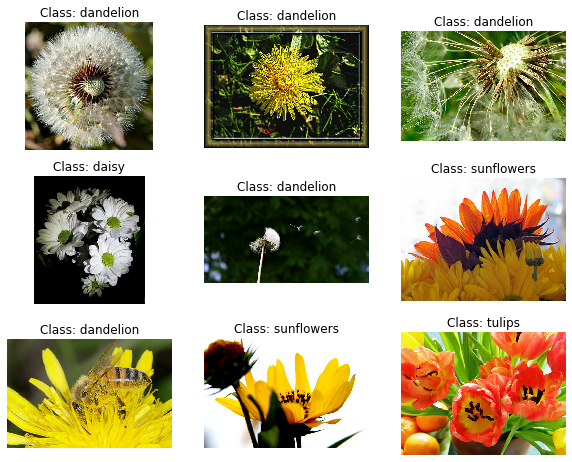

In [24]:
plt.figure(figsize=(10, 8))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")
plt.show()

3. ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜ

- Âü∫Êú¨È¢ÑÂ§ÑÁêÜ:ÂØπËÆ≠ÁªÉÈõÜËøõË°å‰π±Â∫èÔºåÂπ∂‰∏∫ÊâÄÊúâÊï∞ÊçÆÈõÜÊ∑ªÂä†ÊâπÂ§ÑÁêÜÂíåÈ¢ÑÂèñ

In [25]:
from keras.utils import np_utils


def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    label = tf.cast(label, dtype=tf.int32)
    label = tf.squeeze(label)  # tf.squeeze():Áî®‰∫é‰ªéÂº†ÈáèÂΩ¢Áä∂‰∏≠ÁßªÈô§Â§ßÂ∞è‰∏∫1ÁöÑÁª¥Â∫¶
    label = tf.one_hot(label, depth=10)
    return resized_image, label

- Ëøõ‰∏ÄÊ≠•È¢ÑÂ§ÑÁêÜ:Âü∫Êú¨È¢ÑÂ§ÑÁêÜÁöÑÂü∫Á°Ä‰∏ä,ÊâßË°åÊï∞ÊçÆÂ¢ûÂº∫,Âç≥ÂêëËÆ≠ÁªÉÂõæÂÉèÊ∑ªÂä†‰∏Ä‰∫õÈöèÊú∫ÂèòÊç¢

In [26]:
# ‰∏≠Â§ÆË£ÅÂàá
def central_crop(image):
    shape = tf.shape(image)  # height, width
    min_dim = tf.reduce_min([shape[0], shape[1]])

    # ‰ªéÂõæÂÉèÂ∑¶‰∏äÂà∞Âè≥‰∏ã
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop

    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop

    return image[top_crop:bottom_crop, left_crop:right_crop]

In [27]:
# ÈöèÊú∫Ë£ÅÂàá
def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100

    # Â¶ÇÊûú‰∏Ä‰∏™Áª¥Â∫¶‰∏çÂ∫îËØ•Ë¢´Ë£ÅÂâ™ÔºåÂàô‰º†ÈÄíËØ•Áª¥Â∫¶ÁöÑÂÆåÊï¥Â§ßÂ∞è
    cropped_image = tf.image.random_crop(image, size=[min_dim, min_dim, 3])
    return cropped_image

Â¶ÇÊûú‰ΩøÁî®`ËøÅÁßªÂ≠¶‰π†`,ÈúÄË¶ÅÂú®ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÈÉ®ÂàÜÂáèÂéª`ImageNet`ÊâÄÊúâÂõæÂÉèÁöÑÂùáÂÄº,Âç≥**\[123.68, 116.78, 103.94\]** Â¶ÇÊûú‰ΩøÁî®Âà´‰∫∫ÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÂèÇÊï∞,Â∞±ÂøÖÈ°ªÂíåÂà•‰∫∫‰ΩøÁî®Áõ∏ÂêåÁöÑÈ¢ÑÂ§ÑÁêÜÊñπÊ≥ï!

In [31]:
_R_MEAN = 123.68
_G_MEAN = 116.78
_B_MEAN = 103.94

num_classes = 5

In [28]:
def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        # random_flip_left_right:ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨ÂõæÂÉèÔºà‰ªéÂ∑¶Âà∞Âè≥Ôºâ„ÄÇ
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)

    resized_image = tf.image.resize(image, [224, 224])
    final_image = resized_image - [_R_MEAN, _G_MEAN, _B_MEAN]
    return final_image, label

In [32]:
batch_size = 16

train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(
    preprocess, randomize=True)).batch(batch_size).prefetch(1)

valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)

test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

2022-01-25 12:00:50.059143: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-25 12:00:51.441343: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


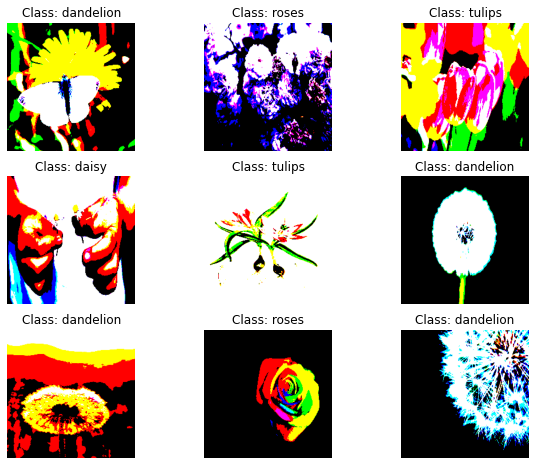

In [14]:
plt.figure(figsize=(10, 8))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index])

        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

4. ‰ΩøÁî®ËøÅÁßªÂ≠¶‰π†

In [35]:
feature = resnet50(num_classes=num_classes, include_top=False)

In [37]:
# Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÊùÉÈáç
pre_weight_path = '../PTmodel/tf_resnet50_weights/pretrain_weights.ckpt'
feature.load_weights(pre_weight_path)
feature.trainable = False  # ÂÜªÁªìÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÊùÉÈáçÂèÇÊï∞
feature.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 64)      9408      
_________________________________________________________________
conv1/BatchNorm (BatchNormal (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_34 (ReLU)              (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
block1 (Sequential)          (None, 56, 56, 256)       218624    
_________________________________________________________________
block2 (Sequential)          (None, 28, 28, 512)       1226

ÂΩìÊàë‰ª¨Â∞Ü `trainable`ËÆæÁΩÆ‰∏∫ `False`Êó∂Ôºå `feature`ÁöÑÊâÄÊúâÊùÉÈáçÈÉΩ‰ºöË¢´ÂÜªÁªìÔºåËÆ≠ÁªÉËøáÁ®ã‰∏≠‰πüÊó†Ê≥ïÂú®ËÆ≠ÁªÉËøô‰∫õÂèÇÊï∞.

In [21]:
# Ê®°ÂûãÊúÄÂêéÈù¢Ê∑ªÂä†ÂÖ®ËøûÊé•Â±Ç
model = Sequential([
    feature,
    GlobalAvgPool2D(),
    Dropout(rate=0.5),
    Dense(1024, activation=keras.activations.relu),
    Dropout(rate=0.5),
    Dense(num_classes),
    Softmax()
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 7, 7, 2048)        23561152  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0

5. ËÆ≠ÁªÉ,ËØÑ‰º∞Ê®°Âûã

In [19]:
# ÁºñËØëÊ®°Âûã
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
# ËÆ≠ÁªÉÊ®°Âûã
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=25)

Epoch 1/25


2022-01-25 12:01:00.904045: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


172/172 [==============================] - 19s 54ms/step - loss: 0.9102 - accuracy: 0.6951 - val_loss: 0.4170 - val_accuracy: 0.8603
Epoch 2/25
172/172 [==============================] - 7s 38ms/step - loss: 0.4956 - accuracy: 0.8201 - val_loss: 0.3629 - val_accuracy: 0.8824
Epoch 3/25
172/172 [==============================] - 7s 38ms/step - loss: 0.3999 - accuracy: 0.8576 - val_loss: 0.3611 - val_accuracy: 0.8971
Epoch 4/25
172/172 [==============================] - 7s 38ms/step - loss: 0.3581 - accuracy: 0.8728 - val_loss: 0.3393 - val_accuracy: 0.8934
Epoch 5/25
172/172 [==============================] - 7s 38ms/step - loss: 0.3155 - accuracy: 0.8917 - val_loss: 0.3286 - val_accuracy: 0.8879
Epoch 6/25
172/172 [==============================] - 7s 39ms/step - loss: 0.2912 - accuracy: 0.8979 - val_loss: 0.3153 - val_accuracy: 0.8915
Epoch 7/25
172/172 [==============================] - 7s 38ms/step - loss: 0.2806 - accuracy: 0.8964 - val_loss: 0.3292 - val_accuracy: 0.8971
Epoch 8/2

In [20]:
model.save("my_ResNet50.ckpt")

2022-01-25 12:04:31.444837: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [21]:
model = keras.models.load_model("../models/my_ResNet50.ckpt")
model.evaluate(test_set)

23/23 [==============================] - 2s 50ms/step - loss: 0.2672 - accuracy: 0.9183


[0.26717084646224976, 0.9182561039924622]

In [22]:
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["accuracy"]
val_loss = history_dict["val_loss"]
val_accuracy = history_dict["val_accuracy"]

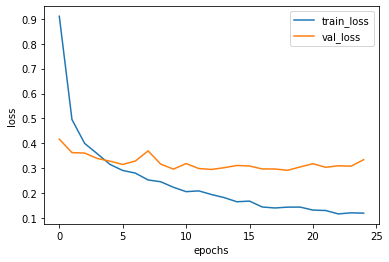

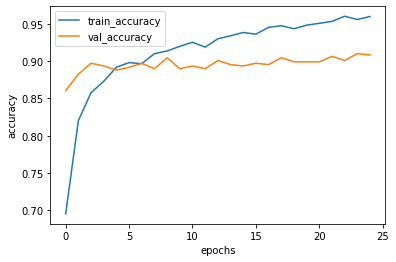

In [23]:
epochs = 25
# figure 1
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# figure 2
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### ‰ΩøÁî®KerasÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°Âûã Using Pretrained Models from Keras

1. Ëé∑ÂèñÈ¢ÑËÆ≠ÁªÉÊ®°Âûã
    
    ÈÄöÂ∏∏ÔºåÊÇ®‰∏çÂøÖÊâãÂä®ÂÆûÁé∞ÂÉè `GoogLeNet` Êàñ `ResNet` ËøôÊ†∑ÁöÑÊ†áÂáÜÊ®°ÂûãÔºåÂõ†‰∏∫È¢ÑËÆ≠ÁªÉÁöÑÁΩëÁªúÂèØ‰ª•ÈÄöËøá `keras.applications` ÂåÖ‰∏≠Ëé∑Âæó„ÄÇ

In [4]:
# ÂàõÂª∫‰∏Ä‰∏™ResNet-50Ê®°ÂûãÂπ∂‰∏ãËΩΩImageNetÊï∞ÊçÆÈõÜ‰∏äÈ¢ÑËÆ≠ÁªÉÁöÑÊùÉÈáç
model = keras.applications.resnet50.ResNet50(weights="imagenet")
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

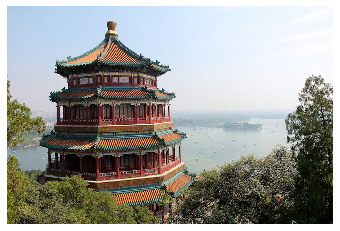

In [5]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255.0
flower = load_sample_image("flower.jpg") / 255.0
images = np.array([china, flower])

plot_color_image(images[0])

2. Ë∞ÉÊï¥ÂõæÂÉèÁöÑÂ§ßÂ∞è

    Ë¶Å‰ΩøÁî®ÂÆÉÔºåÈ¶ñÂÖàÈúÄË¶ÅÁ°Æ‰øùÂõæÂÉèÂÖ∑ÊúâÊ≠£Á°ÆÁöÑÂ§ßÂ∞è„ÄÇ `ResNet-50` Ê®°ÂûãÈúÄË¶Å 224 √ó 224 ÂÉèÁ¥†ÁöÑÂõæÂÉè.

    ‰ΩøÁî®`tf.image.resize()`ÂáΩÊï∞Êù•Ë∞ÉÊï¥Êàë‰ª¨‰πãÂâçÂä†ËΩΩÁöÑÂõæÂÉèÁöÑÂ§ßÂ∞è

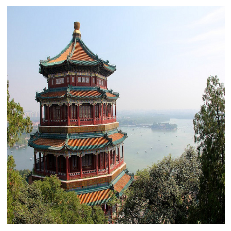

In [6]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])

`tf.image.resize() `‰∏ç‰øùÁïôÂÆΩÈ´òÊØî,ÂèØ‰ª•‰ΩøÁî®

- `tf.image.resize_with_pad()`:Ë∞ÉÊï¥ÂõæÂÉèÂ§ßÂ∞èÂπ∂Â∞ÜÂõæÂÉè**Â°´ÂÖÖ**Âà∞ÁõÆÊ†áÂÆΩÂ∫¶ÂíåÈ´òÂ∫¶„ÄÇ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


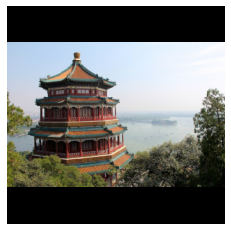

In [7]:
images_resized = tf.image.resize_with_pad(image=images,
                                          target_height=224,
                                          target_width=224,
                                          antialias=True)  # ÊäóÈîØÈΩø
plot_color_image(images_resized[0])

- `tf.image.resize_with_crop_or_pad()`:Â∞ÜÂõæÂÉè**Ë£ÅÂâ™**/Â°´ÂÖÖÂà∞ÁõÆÊ†áÂÆΩÂ∫¶ÂíåÈ´òÂ∫¶„ÄÇ

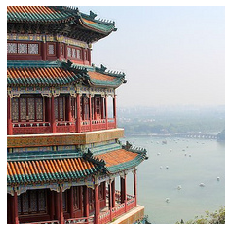

In [8]:
images_resized = tf.image.resize_with_crop_or_pad(image=images,
                                                  target_height=224,
                                                  target_width=224)
plot_color_image(images_resized[0])

- `tf.image.crop_amd_resize()`:ÂêåÊó∂ÂÆûÁé∞ÂõæÂÉèË£ÅÂâ™‰∏∫ÈÄÇÂΩìÂÆΩÈ´òÊØîÂíåË∞ÉÊï¥Â∞∫ÂØ∏ÁöÑÊìç‰Ωú.
```python
tf.image.crop_and_resize(
    image,     
    boxes,
    box_ind,
    crop_size,
    method='bilinear',
    extrapolation_value=0,
    name=None
)
```

    1. `image`:‰∏Ä‰∏™ÂõõÁª¥ÁöÑÂº†Èáè,ËæìÂÖ•Ê†ºÂºè‰∏∫`[batch, image_height, image_width, depth].`
    2. `boxes`:ÊåáÈúÄË¶ÅÂàíÂàÜÁöÑÂå∫Âüü‰ΩçÁΩÆÁöÑÁôæÂàÜÊØîÔºåËæìÂÖ•Ê†ºÂºè‰∏∫ `[[ymin,xmin,ymax,xmax]]` ,ËÆæcropÁöÑÂå∫ÂüüÂùêÊ†á‰∏∫ `[ y1,x1,y2,x2 ]`,ÈÇ£‰πàÊÉ≥ÂæóÂà∞Áõ∏Â∫îÊ≠£Á°ÆÁöÑcropÂõæÂΩ¢Â∞±‰∏ÄÂÆöË¶Å**ÂΩí‰∏ÄÂåñ**ÔºåÂç≥ÂõæÁâáÈïøÂ∫¶‰∏∫ [ W,H ],ÂàôÂÆûÈôÖËæìÂÖ•ÁöÑboxes‰∏∫ [ $\frac{y_1}{H}$,$\frac{x_1}{W}$,$\frac{y_2}{H}$,$\frac{x_2}{W}$ ]„ÄÇ
        - ÊÉÖÂÜµ‰∏Ä:‰∏çË∂ÖÂá∫1
        - ÊÉÖÂÜµ‰∫å:Ë∂ÖÂá∫1--Ëá™Âä®Ë°•ÈΩê,ÂΩìÂÖ®ÈÉ®Ë∂ÖÂá∫1ÔºåÈÇ£Â∞±ÊòØ‰∏™ÈªëËâ≤Ê°Ü‰∫ÜÔºåÂõ†‰∏∫Ë∂ÖÂá∫1Ê†πÊçÆÂΩí‰∏ÄÂåñÊà™Âèñ‰∏çÂà∞ÂõæÁâá‰ªª‰ΩïÂÜÖÂÆπ.
    3. `box_ind`:Áî®‰∫éÁ¥¢Âºï
    4. `crop_size`:ÂõæÂÉèË£ÅÂâ™Â§ßÂ∞è

        ‰æã:ÂõæÂÉèÈ´òÂ∫¶=427 , ÂõæÂÉèÂÆΩÂ∫¶=640, ÁªèËøáÊ†áÂáÜÂåñÂêéÂõæÂÉè($\frac{427}{255.0}$,$\frac{640}{255.0}$).Ê°ÜÈÄâËåÉÂõ¥‰ΩçÁΩÆÁöÑÁôæÂàÜÊØî‰∏∫`[0, 0.03, 1, 0.68]`,
            Âæó [ 0*427=0, 0.03*640=19.2, 1*427=427, 0.68*640=435.2 ],
        Ë∞ÉÊï¥Â§ßÂ∞èÂà∞`[224,224]`

In [9]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]

images_resized = tf.image.crop_and_resize(image=images,
                                          boxes=[china_box, flower_box],
                                          box_indices=[0, 1],
                                          crop_size=[224, 224])

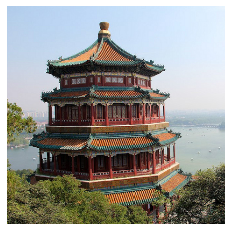

In [10]:
plot_color_image(images_resized[0])

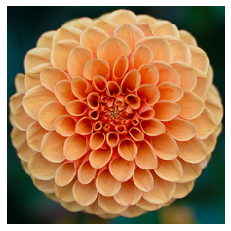

In [11]:
plot_color_image(images_resized[1])

3. Ê†πÊçÆÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÊù•È¢ÑÂ§ÑÁêÜÂõæÂÉè
   
   ÊØè‰∏™Ê®°ÂûãÈÉΩÊèê‰æõ‰∫Ü‰∏Ä‰∏™ `preprocess_input()` ÂáΩÊï∞ÔºåÂèØ‰ª•‰ΩøÁî®ÂÆÉÊù•È¢ÑÂ§ÑÁêÜÊÇ®ÁöÑÂõæÂÉè„ÄÇ**Ëøô‰∫õÂáΩÊï∞ÂÅáÂÆöÂÉèÁ¥†ÂÄºÁöÑËåÉÂõ¥ÊòØ 0 Âà∞ 255**ÔºåÁî±‰∫é‰πãÂâçÁöÑÂ∑•‰ΩúÊàë‰ª¨ÂÆûÁé∞‰∫ÜÂΩí‰∏ÄÂåñ,Âõ†Ê≠§Êàë‰ª¨ÂøÖÈ°ªÂ∞ÜÂÆÉ‰ª¨‰πò‰ª• 255.

In [12]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

4. È¢ÑÊµã
    
    ËæìÂá∫ `y_proba` ÊòØ‰∏Ä‰∏™Áü©ÈòµÔºåÊØèÂπÖÂõæÂÉè‰∏ÄË°åÔºåÊØèÁ±ª‰∏ÄÂàó„ÄÇ
    
    Â¶ÇÊûúË¶ÅÊòæÁ§∫Ââç K ‰∏™È¢ÑÊµã(ÂåÖÊã¨Á±ªÂêçÂíåÊØè‰∏™È¢ÑÊµãÁ±ªÁöÑ‰º∞ËÆ°Ê¶ÇÁéá)‰ΩøÁî® `decode_predictions()`„ÄÇÂØπ‰∫éÊØè‰∏™ÂõæÂÉèÔºåÂÆÉËøîÂõû‰∏Ä‰∏™ÂåÖÂê´Ââç K ‰∏™È¢ÑÊµãÁöÑÊï∞ÁªÑÔºåÂÖ∂‰∏≠ÊØè‰∏™È¢ÑÊµãÈÉΩË°®Á§∫‰∏∫‰∏Ä‰∏™**ÂåÖÂê´Á±ªÊ†áËØÜÁ¨¶**ÔºàÂú® `ImageNet` Êï∞ÊçÆÈõÜ‰∏≠ÔºåÊØè‰∏™ÂõæÂÉèÈÉΩ‰∏é `WordNet `Êï∞ÊçÆÈõÜ‰∏≠ÁöÑ‰∏Ä‰∏™ËØçÁõ∏ÂÖ≥ËÅîÔºöÁ±ªIDÊòØ‰∏Ä‰∏™`WordNetID`Ôºâ,ÂÆÉÁöÑÂêçÁß∞Ôºå‰ª•ÂèäÁõ∏Â∫îÁöÑÁΩÆ‰ø°Â∫¶ÂàÜÊï∞ÁöÑÊï∞ÁªÑ.

In [13]:
y_proba = model.predict(inputs)
np.shape(y_proba)

(2, 1000)

In [14]:
top_K = keras.applications.resnet50.decode_predictions(y_proba, top=3)

for image_index in range(len(images)):  # 0,1
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



## Xception

### ÂéüÁêÜ

Ë∞∑Ê≠å`Xception`ÔºåÂ∞Ü`Ê∑±Â∫¶ÂèØÂàÜÁ¶ªÂç∑ÁßØ`ÂºïÂÖ•`InceptionÊ®°Âùó`ÔºåÂÆûÁé∞ÈïøÂÆΩÊñπÂêëÁöÑÁ©∫Èó¥‰ø°ÊÅØÂíåË∑®ÈÄöÈÅì‰ø°ÊÅØÁöÑÂÆåÂÖ®Ëß£ËÄ¶„ÄÇX‰ª£Ë°®ExtremeÔºåÊûÅËá¥„ÄÇ

Âú®ImageNetÊï∞ÊçÆÈõÜÂíåJFTÊï∞ÊçÆÈõÜ‰∏§‰∏™Â§ßËßÑÊ®°ÂõæÂÉèÂàÜÁ±ª‰ªªÂä°‰∏äÔºåÊî∂ÊïõÈÄüÂ∫¶„ÄÅÊúÄÁªàÂáÜÁ°ÆÁéáÈÉΩË∂ÖËøá`Inception V3`„ÄÇ

`Xception`‰ΩúËÄÖ‰∏∫Ê∑±Â∫¶Â≠¶‰π†Ê°ÜÊû∂Keras‰ΩúËÄÖFran√ßois Chollet„ÄÇÂú®Keras‰∏≠ÂèØË∞ÉÁî®È¢ÑËÆ≠ÁªÉÁöÑ`Xception`Ê®°Âûã‰Ωú‰∏∫ËøÅÁßªÂ≠¶‰π†ÁöÑÈ™®Âπ≤ÁΩëÁªú„ÄÇ

- `Ê∑±Â∫¶ÂèØÂàÜÁ¶ªÂç∑ÁßØ`ÂàÜ‰∏∫‰∏§‰∏™ÈÉ®ÂàÜ:
    - ‰∏∫ÊØè‰∏™ËæìÂÖ•ÁâπÂæÅÂõæÂ∫îÁî®‰∏Ä‰∏™Á©∫Èó¥ËøáÊª§Âô®(ÊØè‰∏™ÈÄöÈÅì‰∏Ä‰∏™)
    - ‰∏ìÈó®ÂØªÊâæÂ§∏ÈÄöÈÅìÊ®°Âºè-ÂÖ∑Êúâ1√ó1Âç∑ÁßØÊ†∏ÁöÑÂ∏∏ËßÑÂç∑ÁßØÂ±Ç

    <img src="../images/other/14-42.png" width="500">
    <img src="../images/other/14-44.png">
    
    ‰∏éÂ∏∏ËßÑÂç∑ÁßØÂ±ÇÁõ∏ÊØîÔºå`ÂèØÂàÜÁ¶ªÂç∑ÁßØÂ±Ç`‰ΩøÁî®Êõ¥Â∞ëÁöÑÂèÇÊï∞„ÄÅÊõ¥Â∞ëÁöÑÂÜÖÂ≠òÂíåÊõ¥Â∞ëÁöÑËÆ°ÁÆóÈáèÔºåËÄå‰∏îÈÄöÂ∏∏ÂÆÉ‰ª¨ÁîöËá≥Ë°®Áé∞ÂæóÊõ¥Â•Ω.
Áî±‰∫éÂèØÂàÜÁ¶ªÂç∑ÁßØÂ±ÇÊØè‰∏™ËæìÂÖ•ÈÄöÈÅìÂè™Êúâ‰∏Ä‰∏™Á©∫Èó¥Êª§Ê≥¢Âô®ÔºåÂõ†Ê≠§Â∫îÈÅøÂÖçÂú®ÈÄöÈÅìÂ§™Â∞ëÁöÑÂ±ÇÔºà‰æãÂ¶ÇËæìÂÖ•Â±ÇÔºâ‰πãÂêé‰ΩøÁî®ÂÆÉ‰ª¨.

    Âõ†Ê≠§Ôºå`Xception` Êû∂ÊûÑ‰ªé 2 ‰∏™Â∏∏ËßÑÂç∑ÁßØÂ±ÇÂºÄÂßãÔºå‰ΩÜÈöèÂêéÊû∂ÊûÑÁöÑÂÖ∂‰ΩôÈÉ®ÂàÜ‰ªÖ‰ΩøÁî®ÂèØÂàÜÁ¶ªÂç∑ÁßØÔºàÊÄªÂÖ± 34 ‰∏™ÔºâÔºåÂä†‰∏äÂá†‰∏™ÊúÄÂ§ßÊ±†ÂåñÂ±ÇÂíåÈÄöÂ∏∏ÁöÑÊúÄÁªàÂ±ÇÔºà‰∏Ä‰∏™ÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÂ±ÇÂíå‰∏Ä‰∏™ÂØÜÈõÜËæìÂá∫Â±ÇÔºâ„ÄÇ



- `Xception`‰∏≠ÊîπËøõÁöÑ`Ê∑±Â∫¶ÂèØÂàÜÁ¶ªÂç∑ÁßØ`‰∏éÂéüÂßã`Ê∑±Â∫¶ÂèØÂàÜÁ¶ªÂç∑ÁßØ`Âå∫Âà´Ôºö
    1. Âú®‰∫éÊìç‰ΩúÈ°∫Â∫è‰∏çÂêåÔºöÂÖàËøõË°å `Pointwise` ÂÜç `Depthwise` 
    2. ÊøÄÊ¥ªÂáΩÊï∞Ôºö `Pointwise` ‰πãÂêé `Depthwise` ‰πãÂâçÔºå**‰∏ç‰ΩøÁî®ÊøÄÊ¥ªÂáΩÊï∞ÊïàÊûúÊúÄÂ•Ω**
    
    <img src="../images/other/14-45.png">

- Êï¥‰ΩìÊû∂ÊûÑ
    <img src="../images/other/14-46.png">

- kerasÊ∫êÁ†Å

In [15]:
import tensorflow.compat.v2 as tf

from keras import backend
from keras.applications import imagenet_utils
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.python.util.tf_export import keras_export

layers = VersionAwareLayers()


def Xception(include_top=True,
             weights='imagenet',
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=1000,
             classifier_activation='softmax'):

    # Á°ÆÂÆöÊ≠£Á°ÆÁöÑËæìÂÖ•ÂΩ¢Áä∂
    input_shape = imagenet_utils.obtain_input_shape(
        input_shape,
        default_size=299,
        min_size=71,
        data_format=backend.image_data_format(),
        require_flatten=include_top,
        weights=weights)

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    channel_axis = 1 if backend.image_data_format() == 'channels_first' else -1

    # Entry flow
    x = layers.Conv2D(32, (3, 3),
                      strides=(2, 2),
                      use_bias=False,
                      name='block1_conv1')(img_input)
    x = layers.BatchNormalization(axis=channel_axis, name='block1_conv1_bn')(x)
    x = layers.Activation('relu', name='block1_conv1_act')(x)
    x = layers.Conv2D(64, (3, 3), use_bias=False, name='block1_conv2')(x)
    x = layers.BatchNormalization(axis=channel_axis, name='block1_conv2_bn')(x)
    x = layers.Activation('relu', name='block1_conv2_act')(x)

    residual = layers.Conv2D(128, (1, 1),
                             strides=(2, 2),
                             padding='same',
                             use_bias=False)(x)
    residual = layers.BatchNormalization(axis=channel_axis)(residual)

    x = layers.SeparableConv2D(128, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block2_sepconv1')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block2_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block2_sepconv2_act')(x)
    x = layers.SeparableConv2D(128, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block2_sepconv2')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block2_sepconv2_bn')(x)

    x = layers.MaxPooling2D((3, 3),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)
    x = layers.add([x, residual])

    residual = layers.Conv2D(256, (1, 1),
                             strides=(2, 2),
                             padding='same',
                             use_bias=False)(x)
    residual = layers.BatchNormalization(axis=channel_axis)(residual)

    x = layers.Activation('relu', name='block3_sepconv1_act')(x)
    x = layers.SeparableConv2D(256, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block3_sepconv1')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block3_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block3_sepconv2_act')(x)
    x = layers.SeparableConv2D(256, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block3_sepconv2')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block3_sepconv2_bn')(x)

    x = layers.MaxPooling2D((3, 3),
                            strides=(2, 2),
                            padding='same',
                            name='block3_pool')(x)
    x = layers.add([x, residual])

    residual = layers.Conv2D(728, (1, 1),
                             strides=(2, 2),
                             padding='same',
                             use_bias=False)(x)
    residual = layers.BatchNormalization(axis=channel_axis)(residual)

    x = layers.Activation('relu', name='block4_sepconv1_act')(x)
    x = layers.SeparableConv2D(728, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block4_sepconv1')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block4_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block4_sepconv2_act')(x)
    x = layers.SeparableConv2D(728, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block4_sepconv2')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block4_sepconv2_bn')(x)

    x = layers.MaxPooling2D((3, 3),
                            strides=(2, 2),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.add([x, residual])

    # Middle flow
    for i in range(8):
        residual = x
        prefix = 'block' + str(i + 5)

        x = layers.Activation('relu', name=prefix + '_sepconv1_act')(x)
        x = layers.SeparableConv2D(728, (3, 3),
                                   padding='same',
                                   use_bias=False,
                                   name=prefix + '_sepconv1')(x)
        x = layers.BatchNormalization(axis=channel_axis,
                                      name=prefix + '_sepconv1_bn')(x)
        x = layers.Activation('relu', name=prefix + '_sepconv2_act')(x)
        x = layers.SeparableConv2D(728, (3, 3),
                                   padding='same',
                                   use_bias=False,
                                   name=prefix + '_sepconv2')(x)
        x = layers.BatchNormalization(axis=channel_axis,
                                      name=prefix + '_sepconv2_bn')(x)
        x = layers.Activation('relu', name=prefix + '_sepconv3_act')(x)
        x = layers.SeparableConv2D(728, (3, 3),
                                   padding='same',
                                   use_bias=False,
                                   name=prefix + '_sepconv3')(x)
        x = layers.BatchNormalization(axis=channel_axis,
                                      name=prefix + '_sepconv3_bn')(x)

        x = layers.add([x, residual])

    # Exit flow
    residual = layers.Conv2D(1024, (1, 1),
                             strides=(2, 2),
                             padding='same',
                             use_bias=False)(x)
    residual = layers.BatchNormalization(axis=channel_axis)(residual)

    x = layers.Activation('relu', name='block13_sepconv1_act')(x)
    x = layers.SeparableConv2D(728, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block13_sepconv1')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block13_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block13_sepconv2_act')(x)
    x = layers.SeparableConv2D(1024, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block13_sepconv2')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block13_sepconv2_bn')(x)

    x = layers.MaxPooling2D((3, 3),
                            strides=(2, 2),
                            padding='same',
                            name='block13_pool')(x)
    x = layers.add([x, residual])

    x = layers.SeparableConv2D(1536, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block14_sepconv1')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block14_sepconv1_bn')(x)
    x = layers.Activation('relu', name='block14_sepconv1_act')(x)

    x = layers.SeparableConv2D(2048, (3, 3),
                               padding='same',
                               use_bias=False,
                               name='block14_sepconv2')(x)
    x = layers.BatchNormalization(axis=channel_axis,
                                  name='block14_sepconv2_bn')(x)
    x = layers.Activation('relu', name='block14_sepconv2_act')(x)

    if include_top:
        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        imagenet_utils.validate_activation(classifier_activation, weights)
        x = layers.Dense(classes,
                         activation=classifier_activation,
                         name='predictions')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D()(x)

    # ÂàõÂª∫Ê®°Âûã
    model = training.Model(inputs, x, name='xception')

    return model

### ËøÅÁßªÂ≠¶‰π†ÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°Âûã Pretrained Models for Transfer Learning

Â¶ÇÊûúÊûÑÂª∫ÂõæÂÉèÂàÜÁ±ªÂô®‰ΩÜÊ≤°ÊúâË∂≥Â§üÁöÑËÆ≠ÁªÉÊï∞ÊçÆÔºåÈÇ£‰πàÂèØ‰ª•ÈáçÁî®È¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑËæÉ‰ΩéÂ±Ç.

‰ΩøÁî®È¢ÑËÆ≠ÁªÉ`Xception`ÂõæÂÉèÂàÜÁ±ª

1. Âä†ËΩΩÊï∞ÊçÆÈõÜ

In [4]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

In [7]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [8]:
n_classes = info.features["label"].num_classes
n_classes

5

In [9]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

2. ÊãÜÂàÜÊï∞ÊçÆÈõÜ

    Áî±‰∫éËØ•Êï∞ÊçÆÈõÜÂè™Êúâ‰∏Ä‰∏™`train`Êï∞ÊçÆÈõÜ,Ê≤°ÊúâÈ™åËØÅÈõÜÂíåÊµãËØïÈõÜ,Âõ†Ê≠§ÈúÄË¶ÅÊãÜÂàÜÊï∞ÊçÆÈõÜ.

In [10]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

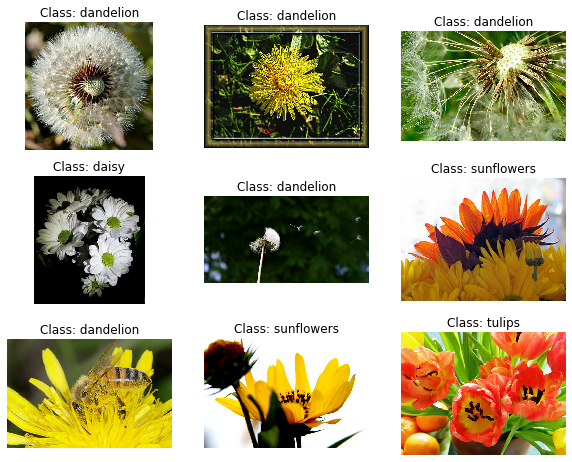

In [11]:
plt.figure(figsize=(10, 8))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")
plt.show()

3. ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜ

- Âü∫Êú¨È¢ÑÂ§ÑÁêÜ:ÂØπËÆ≠ÁªÉÈõÜËøõË°å‰π±Â∫èÔºåÂπ∂‰∏∫ÊâÄÊúâÊï∞ÊçÆÈõÜÊ∑ªÂä†ÊâπÂ§ÑÁêÜÂíåÈ¢ÑÂèñ

In [12]:
from keras.utils import np_utils


def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    label = tf.cast(label, dtype=tf.int32)
    label = tf.squeeze(label)  # tf.squeeze():Áî®‰∫é‰ªéÂº†ÈáèÂΩ¢Áä∂‰∏≠ÁßªÈô§Â§ßÂ∞è‰∏∫1ÁöÑÁª¥Â∫¶
    label = tf.one_hot(label, depth=10)
    return resized_image, label

- Ëøõ‰∏ÄÊ≠•È¢ÑÂ§ÑÁêÜ:Âü∫Êú¨È¢ÑÂ§ÑÁêÜÁöÑÂü∫Á°Ä‰∏ä,ÊâßË°åÊï∞ÊçÆÂ¢ûÂº∫,Âç≥ÂêëËÆ≠ÁªÉÂõæÂÉèÊ∑ªÂä†‰∏Ä‰∫õÈöèÊú∫ÂèòÊç¢

In [13]:
# ‰∏≠Â§ÆË£ÅÂàá
def central_crop(image):
    shape = tf.shape(image)  # height, width
    min_dim = tf.reduce_min([shape[0], shape[1]])

    # ‰ªéÂõæÂÉèÂ∑¶‰∏äÂà∞Âè≥‰∏ã
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop

    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop

    return image[top_crop:bottom_crop, left_crop:right_crop]

In [14]:
# ÈöèÊú∫Ë£ÅÂàá
def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100

    # Â¶ÇÊûú‰∏Ä‰∏™Áª¥Â∫¶‰∏çÂ∫îËØ•Ë¢´Ë£ÅÂâ™ÔºåÂàô‰º†ÈÄíËØ•Áª¥Â∫¶ÁöÑÂÆåÊï¥Â§ßÂ∞è
    cropped_image = tf.image.random_crop(image, size=[min_dim, min_dim, 3])
    return cropped_image

In [15]:
def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        # random_flip_left_right:ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨ÂõæÂÉèÔºà‰ªéÂ∑¶Âà∞Âè≥Ôºâ„ÄÇ
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)

    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [16]:
batch_size = 32

train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(
    preprocess, randomize=True)).batch(batch_size).prefetch(1)

valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)

test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

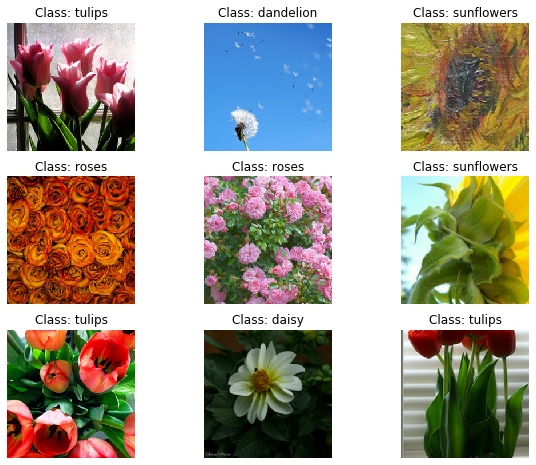

In [17]:
plt.figure(figsize=(10, 8))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)

        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

4. Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉÊ®°Âûã
    
    Âä†ËΩΩÂú® `ImageNet` ‰∏äÈ¢ÑËÆ≠ÁªÉÁöÑ` Xception` Ê®°ÂûãÔºå
    
    `include_top=False`Â∞Ü‰∏çÂåÖÊã¨ÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÂ±ÇÂíåÂØÜÈõÜËæìÂá∫Â±Ç,‰ª•Áî®‰∫éËøÅÁßªÂ≠¶‰π†

In [18]:
initialization()

In [19]:
from tensorflow.keras.layers import Dense, Softmax, GlobalAvgPool2D
from tensorflow.keras.models import Model, Sequential

In [20]:
feature = keras.applications.xception.Xception(weights='imagenet',
                                               include_top=False)

In [21]:
model = Sequential([
    feature,
    GlobalAvgPool2D(),
    Dense(n_classes),
    Softmax()
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
_________________________________________________________________
softmax (Softmax)            (None, 5)                 0         
Total params: 20,871,725
Trainable params: 20,817,197
Non-trainable params: 54,528
_________________________________________________________________


5. ÂÜªÁªìÈ¢ÑËÆ≠ÁªÉÊùÉÈáç,Âπ∂ÁºñËØëËÆ≠ÁªÉÊ®°Âûã

    Âú®ÂâçÂá†‰∏™ËΩÆÊ¨°Êó∂ÂÜªÁªìÈáçÁî®Â±Ç,ÁªôÊñ∞Â±Ç‰∏Ä‰∫õÊó∂Èó¥Êù•Â≠¶‰π†.ÂéüÂõ†ÊòØÊñ∞ÁöÑËæìÂá∫Â±ÇÊòØÈöèÊú∫ÂàùÂßãÂåñÁöÑ,Â≠òÂú®ËæÉÂ§ßÁöÑÈîôËØØ,Ëøô‰ºöÁ†¥ÂùèÈáçÁî®ÁöÑÊùÉÈáç.
    
    ‰∏çÂêå‰∫é`1.2.4.5‰ΩøÁî®ËøÅÁßªÂ≠¶‰π†ËÆ≠ÁªÉ Resnet-50`Âä†ËΩΩÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÂ∑≤ÁªèÁªèËøá‰∫ÜÂ§ÑÁêÜ,ÂâîÈô§‰∫ÜÊó†ÂÖ≥ÁöÑÂèÇÊï∞‰ø°ÊÅØ.ËøôÈáåÊâÄ‰ΩøÁî®ÁöÑÊòØ`feature`ÁöÑÈÉ®ÂàÜÂ±Ç,Âõ†Ê≠§‰ΩøÁî®`feature.trainable = False `Êó†Êïà.
    
    Âú®Ââç 5 ‰∏™ epoch ÂÜªÁªìÈáçÁî®Â±Ç    

In [22]:
for layer in feature.layers:
    layer.trainable = False

In [21]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5


2022-01-24 06:06:35.088702: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


86/86 [==============================] - 18s 102ms/step - loss: 1.1904 - accuracy: 0.7892 - val_loss: 1.0645 - val_accuracy: 0.8382
Epoch 2/5
86/86 [==============================] - 8s 89ms/step - loss: 0.4923 - accuracy: 0.8968 - val_loss: 0.9263 - val_accuracy: 0.8364
Epoch 3/5
86/86 [==============================] - 8s 89ms/step - loss: 0.3200 - accuracy: 0.9190 - val_loss: 0.7915 - val_accuracy: 0.8640
Epoch 4/5
86/86 [==============================] - 8s 88ms/step - loss: 0.2513 - accuracy: 0.9299 - val_loss: 0.6230 - val_accuracy: 0.8732
Epoch 5/5
86/86 [==============================] - 8s 89ms/step - loss: 0.1853 - accuracy: 0.9466 - val_loss: 0.5692 - val_accuracy: 0.8750


ÂØπÊ®°ÂûãËøõË°åÂá†ËΩÆÁöÑËÆ≠ÁªÉ‰πãÂêé,È™åËØÅÈõÜ‰∏äÁöÑÂáÜÁ°ÆÂ∫¶Áª¥ÊåÅÁùÄ87%Â∑¶Âè≥,Âπ∂‰∏î‰∏çÂÜçÂèñÂæóÂæàÂ§ßÁöÑËøõÂ±ï.ËøôÊÑèÂë≥ÁùÄÈ°∂Â±ÇÁé∞Âú®Â∑≤ÁªèÂèóÂà∞‰∫ÜËâØÂ•ΩÁöÑËÆ≠ÁªÉ,Âõ†Ê≠§Êé•‰∏ãÊù•Ëß£ÂÜªÊâÄÊúâÂ±Ç,Âπ∂ÁªßÁª≠ËøõË°åËÆ≠ÁªÉ.Ê≥®ÊÑèË¶Å‰ΩøÁî®ËæÉ‰ΩéÁöÑÂ≠¶‰π†ÁéáÈÅøÂÖçÊçüÂùèËÆ≠ÁªÉÁöÑÊùÉÈáç.

6. Ëß£ÂÜªÈ¢ÑËÆ≠ÁªÉÊùÉÈáç,Âπ∂ÁºñËØëËÆ≠ÁªÉÊ®°Âûã

In [22]:
for layer in feature.layers:
    layer.trainable = True

In [23]:
optimizer = keras.optimizers.SGD(learning_rate=0.01,
                                 momentum=0.9,
                                 nesterov=True,
                                 decay=0.001)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

Epoch 1/40
86/86 [==============================] - 38s 396ms/step - loss: 0.3484 - accuracy: 0.8884 - val_loss: 0.2582 - val_accuracy: 0.9228
Epoch 2/40
86/86 [==============================] - 34s 390ms/step - loss: 0.1042 - accuracy: 0.9680 - val_loss: 0.2501 - val_accuracy: 0.9062
Epoch 3/40
86/86 [==============================] - 33s 389ms/step - loss: 0.0706 - accuracy: 0.9764 - val_loss: 0.2688 - val_accuracy: 0.9062
Epoch 4/40
86/86 [==============================] - 33s 387ms/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.1961 - val_accuracy: 0.9338
Epoch 5/40
86/86 [==============================] - 33s 386ms/step - loss: 0.0314 - accuracy: 0.9876 - val_loss: 0.2542 - val_accuracy: 0.9136
Epoch 6/40
86/86 [==============================] - 33s 386ms/step - loss: 0.0205 - accuracy: 0.9927 - val_loss: 0.2779 - val_accuracy: 0.9283
Epoch 7/40
86/86 [==============================] - 33s 386ms/step - loss: 0.0302 - accuracy: 0.9895 - val_loss: 0.3494 - val_accuracy: 0.8989

È™åËØÅÈõÜ‰∏äÁöÑÂáÜÁ°ÆÂ∫¶ËææÂà∞‰∫ÜÁ∫¶95%ÁöÑÁ≤æÂ∫¶.

## SENet

### ÂéüÁêÜ

Âú® `ILSVRC 2017` ÊåëÊàòËµõ‰∏≠Ëé∑ËÉúÁöÑÊû∂ÊûÑÊòØ `SE Net`„ÄÇËØ•Êû∂ÊûÑÊâ©Â±ï‰∫ÜÁé∞ÊúâÊû∂ÊûÑ(‰æãÂ¶Ç `inception ÁΩëÁªú`Âíå `ResNets`)Âπ∂ÊèêÈ´ò‰∫ÜÂÆÉ‰ª¨ÁöÑÊÄßËÉΩ„ÄÇËøôËÆ© `SENet` ‰ª•ÊÉä‰∫∫ÁöÑ 2.25% top-5 ÈîôËØØÁéáËµ¢Âæó‰∫ÜÊØîËµõÔºÅ

`inceptionÁΩëÁªú`Âíå `ResNet ÁΩëÁªú`ÁöÑÊâ©Â±ïÁâàÊú¨ÂàÜÂà´Áß∞‰∏∫ `SE-Inception` Âíå `SE-ResNet`„ÄÇ

ÊèêÂçáÊù•Ëá™‰∫é‰∏Ä‰∏™‰∫ãÂÆû--Âç≥ `SENet` ÂêëÂéüÂßãÊû∂ÊûÑ‰∏≠ÁöÑÊØè‰∏™ÂçïÂÖÉ(Âç≥ÊØè‰∏™`inception`Ê®°ÂùóÊàñÊØè‰∏™ÊÆãÂ∑ÆÂçïÂÖÉ)**Ê∑ªÂä†‰∫Ü‰∏Ä‰∏™Áß∞‰∏∫ `SE Âùó`ÁöÑÂ∞èÂûãÁ•ûÁªèÁΩëÁªú.**

- `SENet`ÁöÑ‰∏ªË¶ÅÊÄùÊÉ≥:ÈÄöËøáÂ≠¶‰π†ÁöÑÊñπÂºèÊù•Ëá™Âä®Ëé∑ÂèñÂà∞ÊØè‰∏™ÁâπÂæÅÈÄöÈÅìÁöÑÈáçË¶ÅÁ®ãÂ∫¶ÔºåÁÑ∂Âêé‰æùÁÖßËøô‰∏™ÈáçË¶ÅÁ®ãÂ∫¶ÂéªÊèêÂçáÊúâÁî®ÁöÑÁâπÂæÅÂπ∂ÊäëÂà∂ÂØπÂΩìÂâç‰ªªÂä°Áî®Â§Ñ‰∏çÂ§ßÁöÑÁâπÂæÅ„ÄÇ

`SEÂùó`ÂàÜÊûêÂÆÉÊâÄËøûÊé•ÁöÑÂçïÂÖÉÁöÑËæìÂá∫ÔºåÂè™ÂÖ≥Ê≥®Ê∑±Â∫¶Áª¥Â∫¶ÔºàÂÆÉ‰∏çÂØªÊâæ‰ªª‰ΩïÁ©∫Èó¥Ê®°ÂºèÔºâÔºåÂπ∂‰∫ÜËß£Âì™‰∫õÁâπÂæÅÈÄöÂ∏∏ÊòØÊúÄÊ¥ªË∑É„ÄÇÁÑ∂Âêé‰ΩøÁî®Ê≠§‰ø°ÊÅØ**ÈáçÊñ∞Ê†°ÂáÜÁâπÂæÅÂõæ.**

‰æãÂ¶ÇÔºå`SEÂùó`ÂèØËÉΩ‰ºöÂ≠¶‰π†Âò¥„ÄÅÈºªÂ≠êÂíåÁúºÁùõÈÄöÂ∏∏‰∏ÄËµ∑Âá∫Áé∞ÁöÑÂõæÁâáÔºöÂ¶ÇÊûú‰Ω†ÁúãÂà∞‰∏Ä‰∏™ÈºªÂ≠êÔºåÊÇ®‰πüÂ∫îËØ•ÊúüÊúõÁúãÂà∞ÁúºÁùõ„ÄÇÂõ†Ê≠§ÔºåÂ¶ÇÊûúÂùóÂú®Âò¥Â∑¥ÂíåÈºªÂ≠êÁâπÂæÅÂõæ‰∏≠ÁúãÂà∞Âº∫ÁÉàÁöÑÊøÄÊ¥ªÔºå‰ΩÜÂú®ÁúºÁùõÁâπÂæÅÂõæ‰∏≠Âè™ÊúâËΩªÂæÆÁöÑÊøÄÊ¥ªÔºåÂÆÉÂ∞ÜÊèêÂçáÁúºÁùõÁâπÂæÅÂõæÔºàÊõ¥ÂáÜÁ°ÆÂú∞ËØ¥Ôºå**ÂÆÉÂ∞ÜÂáèÂ∞ë‰∏çÁõ∏ÂÖ≥ÁöÑÁâπÂæÅÂõæ**Ôºâ„ÄÇÂ¶ÇÊûúÁúºÁùõ‰∏éÂÖ∂‰ªñ‰∏úË•øÊúâ‰∫õÊ∑∑Ê∑ÜÔºåËøôÁßçÁâπÂæÅÂõæÈáçÊñ∞Ê†°ÂáÜÂ∞ÜÊúâÂä©‰∫éËß£ÂÜ≥Ê≠ß‰πâ„ÄÇ

<img src="../images/other/14-48.png" width="500">

`SEÂùó`‰ªÖÁî±‰∏âÂ±ÇÁªÑÊàêÔºö`ÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÂ±Ç`„ÄÅ‰ΩøÁî®`ReLU` ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÈöêËóèÂØÜÈõÜÂ±ÇÂíå‰ΩøÁî® `sigmoid` ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÂØÜÈõÜËæìÂá∫Â±Ç.

- Ê®°ÂûãËØ¶Ëß£

    <img src="../images/other/14-50.jpg"  width="500">
    
    ‰∏äÂõæÊòØÊàë‰ª¨ÊèêÂá∫ÁöÑ `SE Ê®°Âùó`ÁöÑÁ§∫ÊÑèÂõæ„ÄÇÁªôÂÆö‰∏Ä‰∏™ËæìÂÖ• $x$ÔºåÂÖ∂ÁâπÂæÅÈÄöÈÅìÊï∞‰∏∫ $c_1$ÔºåÈÄöËøá‰∏ÄÁ≥ªÂàóÂç∑ÁßØÁ≠â‰∏ÄËà¨ÂèòÊç¢$F_{tr}$ÂêéÂæóÂà∞‰∏Ä‰∏™ÁâπÂæÅÈÄöÈÅìÊï∞‰∏∫ $c_2$ ÁöÑÁâπÂæÅ„ÄÇ‰∏é‰º†ÁªüÁöÑ CNN ‰∏ç‰∏ÄÊ†∑ÁöÑÊòØÔºåÊé•‰∏ãÊù•Êàë‰ª¨ÈÄöËøá‰∏â‰∏™Êìç‰ΩúÊù•ÈáçÊ†áÂÆöÂâçÈù¢ÂæóÂà∞ÁöÑÁâπÂæÅ„ÄÇ

    1. È¶ñÂÖàÊòØ `Squeeze Êìç‰Ωú`ÔºåÊàë‰ª¨È°∫ÁùÄÁ©∫Èó¥Áª¥Â∫¶Êù•ËøõË°åÁâπÂæÅÂéãÁº©Ôºå**Â∞Ü‰∏Ä‰∏™ÈÄöÈÅì‰∏≠Êï¥‰∏™Á©∫Èó¥ÁâπÂæÅÁºñÁ†Å‰∏∫‰∏Ä‰∏™ÂÖ®Â±ÄÁâπÂæÅ**ÔºåËøô‰∏™ÂÆûÊï∞ÊüêÁßçÁ®ãÂ∫¶‰∏äÂÖ∑ÊúâÂÖ®Â±ÄÁöÑÊÑüÂèóÈáéÔºåÂπ∂‰∏îËæìÂá∫ÁöÑÁª¥Â∫¶ÂíåËæìÂÖ•ÁöÑÁâπÂæÅÈÄöÈÅìÊï∞Áõ∏ÂåπÈÖç„ÄÇÂÆÉË°®ÂæÅÁùÄÂú®ÁâπÂæÅÈÄöÈÅì‰∏äÂìçÂ∫îÁöÑÂÖ®Â±ÄÂàÜÂ∏ÉÔºåËÄå‰∏î‰ΩøÂæóÈù†ËøëËæìÂÖ•ÁöÑÂ±Ç‰πüÂèØ‰ª•Ëé∑ÂæóÂÖ®Â±ÄÁöÑÊÑüÂèóÈáéÔºåËøô‰∏ÄÁÇπÂú®ÂæàÂ§ö‰ªªÂä°‰∏≠ÈÉΩÊòØÈùûÂ∏∏ÊúâÁî®ÁöÑ„ÄÇÊ≠§Êìç‰ΩúÈÄöÂ∏∏ÈááÁî®ÈááÁî® `global average pooling `Êù•ÂÆûÁé∞„ÄÇ

    2. ÂæóÂà∞‰∫ÜÂÖ®Â±ÄÊèèËø∞ÁâπÂæÅÂêéÔºåÊàë‰ª¨ËøõË°å `Excitation Êìç‰Ωú`ÔºåÂÆÉÊòØ‰∏Ä‰∏™Á±ª‰ºº‰∫éÂæ™ÁéØÁ•ûÁªèÁΩëÁªú‰∏≠Èó®ÁöÑÊú∫Âà∂,Áî®‰∫éÊù•ÊäìÂèñÁâπÂæÅÈÄöÈÅì‰πãÈó¥ÁöÑÂÖ≥Á≥ª„ÄÇÈÄöËøáÂèÇÊï∞ $W$ Êù•‰∏∫ÊØè‰∏™ÁâπÂæÅÈÄöÈÅìÁîüÊàêÊùÉÈáçÔºåÂÖ∂‰∏≠ÂèÇÊï∞ $W$ Ë¢´Â≠¶‰π†Áî®Êù•ÊòæÂºèÂú∞Âª∫Ê®°ÁâπÂæÅÈÄöÈÅìÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄß„ÄÇ
    
    $$
    s=F_{e x}(z, W)=\sigma(g(z, W))=\sigma\left(W_{2} \operatorname{Re} L U\left(W_{1} z\right)\right)
    $$
    
    ËøôÈáåÈááÁî®ÂåÖÂê´‰∏§‰∏™ÂÖ®ËøûÊé•Â±ÇÁöÑ `bottleneck` ÁªìÊûÑÔºåÂç≥‰∏≠Èó¥Â∞è‰∏§Â§¥Â§ßÁöÑÁªìÊûÑÔºöÂÖ∂‰∏≠Á¨¨‰∏Ä‰∏™ÂÖ®ËøûÊé•Â±ÇËµ∑Âà∞ÈôçÁª¥ÁöÑ‰ΩúÁî®ÔºåÂπ∂ÈÄöËøá ReLU ÊøÄÊ¥ªÔºåÁ¨¨‰∫å‰∏™ÂÖ®ËøûÊé•Â±ÇÁî®Êù•Â∞ÜÂÖ∂ÊÅ¢Â§çËá≥ÂéüÂßãÁöÑÁª¥Â∫¶„ÄÇËøõË°å `Excitation Êìç‰Ωú`ÁöÑÊúÄÁªàÁõÆÁöÑÊòØ‰∏∫ÊØè‰∏™ÁâπÂæÅÈÄöÈÅìÁîüÊàêÊùÉÈáçÔºåÂç≥Â≠¶‰π†Âà∞ÁöÑÂêÑ‰∏™ÈÄöÈÅìÁöÑÊøÄÊ¥ªÂÄºÔºàsigmoid ÊøÄÊ¥ªÔºåÂÄºÂú® 0~1 ‰πãÈó¥Ôºâ„ÄÇ
    <img src="../images/other/14-49.png" width="200">
    
    3. ÊúÄÂêéÊòØ‰∏Ä‰∏™ `ScaleÊìç‰Ωú`ÔºåÊàë‰ª¨Â∞Ü `Excitation` ÁöÑËæìÂá∫ÁöÑÊùÉÈáçÁúãÂÅöÊòØÁªèËøáÁâπÂæÅÈÄâÊã©ÂêéÁöÑÊØè‰∏™ÁâπÂæÅÈÄöÈÅìÁöÑÈáçË¶ÅÊÄßÔºåÁÑ∂ÂêéÈÄöËøá‰πòÊ≥ïÈÄêÈÄöÈÅìÂä†ÊùÉÂà∞ÂÖàÂâçÁöÑÁâπÂæÅ‰∏äÔºåÂÆåÊàêÂú®ÈÄöÈÅìÁª¥Â∫¶‰∏äÁöÑÂØπÂéüÂßãÁâπÂæÅÁöÑÈáçÊ†áÂÆöÔºå‰ªéËÄå‰ΩøÂæóÊ®°ÂûãÂØπÂêÑ‰∏™ÈÄöÈÅìÁöÑÁâπÂæÅÊõ¥ÊúâËæ®Âà´ËÉΩÂäõÔºåËøôÁ±ª‰ºº‰∫é`attentionÊú∫Âà∂`„ÄÇ

<img src="../images/other/14-47.png" width="400">

‰∏äÂõæÂ∑¶‰æßÊòØ`SE-Inception` Ê®°Âùó,Âè≥‰æßÊòØ`SE-ResNet`Ê®°Âùó.
<img src="../images/other/14-51.jpg"  width="600">

> create:Apotosome 01/25/22

> update:Apotosome 10/26/22